<h4> 데이터 전처리

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('./santander-customer-satisfaction/train.csv',encoding='latin-1')
print('dataset shape : ',cust_df.shape)
cust_df.head(3)

dataset shape :  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [13]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [14]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [15]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [16]:
print(cust_df['var3'].value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [17]:
## var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
x_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape: {0}'.format(x_features.shape))

피처 데이터 shape: (76020, 369)


In [23]:
from sklearn.model_selection import train_test_split

# stratify = y_labels
# 학습 세트 레이블 값의 분포와 테스트 세트 레이블 값의 분포를 매우 비슷하게해줌
x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels,
                                                   test_size=0.2, random_state=0, stratify=y_labels)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 shape : {0}, 테스트 세트 shape : {1}'.format(x_train.shape,x_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 shape : (60816, 369), 테스트 세트 shape : (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960438
1    0.039562
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators = 500, random_state = 156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
# 실제 검증에서는 x_test, y_test 로 하면 안됨.
xgb_clf.fit(x_train, y_train, early_stopping_rounds = 100,
           eval_metric = "auc", eval_set=[(x_train,y_train),(x_test,y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(x_test)[:,1], average='macro')
print("ROC AUC : {0:4f}".format(xgb_roc_score))

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82569	validation_1-auc:0.79283
[1]	validation_0-auc:0.84010	validation_1-auc:0.80737
[2]	validation_0-auc:0.84361	validation_1-auc:0.81021
[3]	validation_0-auc:0.84783	validation_1-auc:0.81287
[4]	validation_0-auc:0.85123	validation_1-auc:0.81469
[5]	validation_0-auc:0.85518	validation_1-auc:0.81860
[6]	validation_0-auc:0.85922	validation_1-auc:0.81977
[7]	validation_0-auc:0.86238	validation_1-auc:0.82034
[8]	validation_0-auc:0.86570	validation_1-auc:0.82147
[9]	validation_0-auc:0.86798	validation_1-auc:0.82301
[10]	validation_0-auc:0.87104	validation_1-auc:0.82379
[11]	validation_0-auc:0.87448	validation_1-auc:0.82456
[12]	validation_0-auc:0.87687	validation_1-auc:0.82401
[13]	validation_0-auc:0.87918	validation_1-auc:0.82467
[14]	validation_0-auc:0.88081	validation_1-auc:0.82508
[15]	validation_0-auc:0.88331	validation_1-auc:0.82379
[16]	validation_0-auc:0.88569	validation_1-auc:0.82457
[17]	validation_0-auc:0.88675	validation_1-auc:0.82453
[18]	validation_0-au

In [30]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight' : [1,3],'colsample_bytree' : [0.5,0.75]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid = params)
gridcv.fit(x_train, y_train, early_stopping_rounds = 30, eval_metric = "auc",
          eval_set =[(x_train,y_train),(x_test,y_test)])

print('GridSearchCV 최적 파라미터 : ',gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:,1], average="macro")
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81196	validation_1-auc:0.78311
[1]	validation_0-auc:0.82815	validation_1-auc:0.79759
[2]	validation_0-auc:0.83364	validation_1-auc:0.80231
[3]	validation_0-auc:0.83628	validation_1-auc:0.80267
[4]	validation_0-auc:0.83979	validation_1-auc:0.80647
[5]	validation_0-auc:0.84405	validation_1-auc:0.80978
[6]	validation_0-auc:0.84408	validation_1-auc:0.81103
[7]	validation_0-auc:0.85033	validation_1-auc:0.81607
[8]	validation_0-auc:0.85357	validation_1-auc:0.81771
[9]	validation_0-auc:0.85404	validation_1-auc:0.81508
[10]	validation_0-auc:0.85333	validation_1-auc:0.80812
[11]	validation_0-auc:0.85347	validation_1-auc:0.80705
[12]	validation_0-auc:0.85882	validation_1-auc:0.81215
[13]	validation_0-auc:0.86287	validation_1-auc:0.81618
[14]	validation_0-auc:0.86477	validation_1-auc:0.81885
[15]	validation_0-auc:0.86623	validation_1-auc:0.81808
[16]	validation_0-auc:0.86791	validation_1-auc:0.81950
[17]	validation_0-auc:0.86934	validation_1-auc:0.82026
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80413	validation_1-auc:0.77478
[1]	validation_0-auc:0.82443	validation_1-auc:0.79170
[2]	validation_0-auc:0.83344	validation_1-auc:0.80294
[3]	validation_0-auc:0.83715	validation_1-auc:0.80612
[4]	validation_0-auc:0.84016	validation_1-auc:0.80942
[5]	validation_0-auc:0.84294	validation_1-auc:0.80869
[6]	validation_0-auc:0.84259	validation_1-auc:0.80731
[7]	validation_0-auc:0.84824	validation_1-auc:0.81229
[8]	validation_0-auc:0.85239	validation_1-auc:0.81684
[9]	validation_0-auc:0.85437	validation_1-auc:0.81316
[10]	validation_0-auc:0.85412	validation_1-auc:0.80958
[11]	validation_0-auc:0.85495	validation_1-auc:0.80690
[12]	validation_0-auc:0.85997	validation_1-auc:0.81257
[13]	validation_0-auc:0.86348	validation_1-auc:0.81494
[14]	validation_0-auc:0.86522	validation_1-auc:0.81739
[15]	validation_0-auc:0.86680	validation_1-auc:0.81599
[16]	validation_0-auc:0.86784	validation_1-auc:0.81801
[17]	validation_0-auc:0.86972	validation_1-auc:0.81903
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80538	validation_1-auc:0.77744
[1]	validation_0-auc:0.82513	validation_1-auc:0.79336
[2]	validation_0-auc:0.83523	validation_1-auc:0.80539
[3]	validation_0-auc:0.83633	validation_1-auc:0.80589
[4]	validation_0-auc:0.83990	validation_1-auc:0.80931
[5]	validation_0-auc:0.84383	validation_1-auc:0.80933
[6]	validation_0-auc:0.84384	validation_1-auc:0.80945
[7]	validation_0-auc:0.85141	validation_1-auc:0.81511
[8]	validation_0-auc:0.85464	validation_1-auc:0.81980
[9]	validation_0-auc:0.85500	validation_1-auc:0.81631
[10]	validation_0-auc:0.85399	validation_1-auc:0.81148
[11]	validation_0-auc:0.85426	validation_1-auc:0.80956
[12]	validation_0-auc:0.85958	validation_1-auc:0.81600
[13]	validation_0-auc:0.86319	validation_1-auc:0.81903
[14]	validation_0-auc:0.86488	validation_1-auc:0.81980
[15]	validation_0-auc:0.86592	validation_1-auc:0.81949
[16]	validation_0-auc:0.86759	validation_1-auc:0.82195
[17]	validation_0-auc:0.86908	validation_1-auc:0.82277
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81438	validation_1-auc:0.78815
[1]	validation_0-auc:0.83069	validation_1-auc:0.80081
[2]	validation_0-auc:0.83551	validation_1-auc:0.80440
[3]	validation_0-auc:0.83982	validation_1-auc:0.80669
[4]	validation_0-auc:0.84157	validation_1-auc:0.80774
[5]	validation_0-auc:0.84461	validation_1-auc:0.80953
[6]	validation_0-auc:0.84533	validation_1-auc:0.80685
[7]	validation_0-auc:0.84996	validation_1-auc:0.81171
[8]	validation_0-auc:0.85305	validation_1-auc:0.81596
[9]	validation_0-auc:0.85237	validation_1-auc:0.81168
[10]	validation_0-auc:0.85213	validation_1-auc:0.80620
[11]	validation_0-auc:0.85228	validation_1-auc:0.80542
[12]	validation_0-auc:0.85766	validation_1-auc:0.81098
[13]	validation_0-auc:0.86162	validation_1-auc:0.81492
[14]	validation_0-auc:0.86357	validation_1-auc:0.81755
[15]	validation_0-auc:0.86517	validation_1-auc:0.81839
[16]	validation_0-auc:0.86657	validation_1-auc:0.82037
[17]	validation_0-auc:0.86808	validation_1-auc:0.82154
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81069	validation_1-auc:0.78599
[1]	validation_0-auc:0.83132	validation_1-auc:0.80272
[2]	validation_0-auc:0.83632	validation_1-auc:0.81009
[3]	validation_0-auc:0.83694	validation_1-auc:0.80785
[4]	validation_0-auc:0.84213	validation_1-auc:0.81207
[5]	validation_0-auc:0.84361	validation_1-auc:0.80922
[6]	validation_0-auc:0.84408	validation_1-auc:0.80712
[7]	validation_0-auc:0.85097	validation_1-auc:0.81336
[8]	validation_0-auc:0.85384	validation_1-auc:0.81675
[9]	validation_0-auc:0.85358	validation_1-auc:0.81322
[10]	validation_0-auc:0.85337	validation_1-auc:0.81003
[11]	validation_0-auc:0.85337	validation_1-auc:0.80910
[12]	validation_0-auc:0.85833	validation_1-auc:0.81418
[13]	validation_0-auc:0.86149	validation_1-auc:0.81935
[14]	validation_0-auc:0.86341	validation_1-auc:0.82036
[15]	validation_0-auc:0.86453	validation_1-auc:0.81874
[16]	validation_0-auc:0.86566	validation_1-auc:0.82121
[17]	validation_0-auc:0.86745	validation_1-auc:0.82276
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81093	validation_1-auc:0.78344
[1]	validation_0-auc:0.82761	validation_1-auc:0.79942
[2]	validation_0-auc:0.83469	validation_1-auc:0.80406
[3]	validation_0-auc:0.83710	validation_1-auc:0.80770
[4]	validation_0-auc:0.84186	validation_1-auc:0.81303
[5]	validation_0-auc:0.84434	validation_1-auc:0.81215
[6]	validation_0-auc:0.84295	validation_1-auc:0.81177
[7]	validation_0-auc:0.84888	validation_1-auc:0.81587
[8]	validation_0-auc:0.85170	validation_1-auc:0.81872
[9]	validation_0-auc:0.85170	validation_1-auc:0.81536
[10]	validation_0-auc:0.85086	validation_1-auc:0.81243
[11]	validation_0-auc:0.85066	validation_1-auc:0.81011
[12]	validation_0-auc:0.85561	validation_1-auc:0.81449
[13]	validation_0-auc:0.85998	validation_1-auc:0.81874
[14]	validation_0-auc:0.86138	validation_1-auc:0.82012
[15]	validation_0-auc:0.86281	validation_1-auc:0.81982
[16]	validation_0-auc:0.86406	validation_1-auc:0.82235
[17]	validation_0-auc:0.86525	validation_1-auc:0.82258
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80412	validation_1-auc:0.77157
[1]	validation_0-auc:0.82371	validation_1-auc:0.79192
[2]	validation_0-auc:0.83260	validation_1-auc:0.80363
[3]	validation_0-auc:0.83809	validation_1-auc:0.80815
[4]	validation_0-auc:0.84217	validation_1-auc:0.81438
[5]	validation_0-auc:0.84284	validation_1-auc:0.80967
[6]	validation_0-auc:0.84130	validation_1-auc:0.80700
[7]	validation_0-auc:0.84717	validation_1-auc:0.81253
[8]	validation_0-auc:0.85223	validation_1-auc:0.81643
[9]	validation_0-auc:0.85361	validation_1-auc:0.81283
[10]	validation_0-auc:0.85392	validation_1-auc:0.81040
[11]	validation_0-auc:0.85369	validation_1-auc:0.80912
[12]	validation_0-auc:0.85815	validation_1-auc:0.81441
[13]	validation_0-auc:0.86145	validation_1-auc:0.81707
[14]	validation_0-auc:0.86336	validation_1-auc:0.81917
[15]	validation_0-auc:0.86493	validation_1-auc:0.81920
[16]	validation_0-auc:0.86589	validation_1-auc:0.82037
[17]	validation_0-auc:0.86740	validation_1-auc:0.82050
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80648	validation_1-auc:0.77981
[1]	validation_0-auc:0.82462	validation_1-auc:0.79283
[2]	validation_0-auc:0.83492	validation_1-auc:0.80556
[3]	validation_0-auc:0.83593	validation_1-auc:0.80577
[4]	validation_0-auc:0.83794	validation_1-auc:0.80770
[5]	validation_0-auc:0.84289	validation_1-auc:0.80848
[6]	validation_0-auc:0.84285	validation_1-auc:0.80640
[7]	validation_0-auc:0.84985	validation_1-auc:0.81215
[8]	validation_0-auc:0.85331	validation_1-auc:0.81564
[9]	validation_0-auc:0.85353	validation_1-auc:0.81253
[10]	validation_0-auc:0.85231	validation_1-auc:0.80888
[11]	validation_0-auc:0.85254	validation_1-auc:0.80739
[12]	validation_0-auc:0.85737	validation_1-auc:0.81491
[13]	validation_0-auc:0.86136	validation_1-auc:0.81867
[14]	validation_0-auc:0.86279	validation_1-auc:0.82105
[15]	validation_0-auc:0.86417	validation_1-auc:0.81983
[16]	validation_0-auc:0.86593	validation_1-auc:0.82124
[17]	validation_0-auc:0.86714	validation_1-auc:0.82192
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81378	validation_1-auc:0.78841
[1]	validation_0-auc:0.83066	validation_1-auc:0.80140
[2]	validation_0-auc:0.83639	validation_1-auc:0.80502
[3]	validation_0-auc:0.83971	validation_1-auc:0.80698
[4]	validation_0-auc:0.84168	validation_1-auc:0.81087
[5]	validation_0-auc:0.84476	validation_1-auc:0.81000
[6]	validation_0-auc:0.84547	validation_1-auc:0.80695
[7]	validation_0-auc:0.84961	validation_1-auc:0.81206
[8]	validation_0-auc:0.85208	validation_1-auc:0.81562
[9]	validation_0-auc:0.85292	validation_1-auc:0.81384
[10]	validation_0-auc:0.85175	validation_1-auc:0.80998
[11]	validation_0-auc:0.85225	validation_1-auc:0.80817
[12]	validation_0-auc:0.85668	validation_1-auc:0.81355
[13]	validation_0-auc:0.86038	validation_1-auc:0.81719
[14]	validation_0-auc:0.86230	validation_1-auc:0.81980
[15]	validation_0-auc:0.86379	validation_1-auc:0.81793
[16]	validation_0-auc:0.86550	validation_1-auc:0.81957
[17]	validation_0-auc:0.86747	validation_1-auc:0.82099
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81166	validation_1-auc:0.78827
[1]	validation_0-auc:0.83074	validation_1-auc:0.80555
[2]	validation_0-auc:0.83694	validation_1-auc:0.81166
[3]	validation_0-auc:0.83904	validation_1-auc:0.81318
[4]	validation_0-auc:0.84183	validation_1-auc:0.81557
[5]	validation_0-auc:0.84369	validation_1-auc:0.81187
[6]	validation_0-auc:0.84358	validation_1-auc:0.81032
[7]	validation_0-auc:0.84970	validation_1-auc:0.81444
[8]	validation_0-auc:0.85267	validation_1-auc:0.81740
[9]	validation_0-auc:0.85294	validation_1-auc:0.81356
[10]	validation_0-auc:0.85262	validation_1-auc:0.81051
[11]	validation_0-auc:0.85272	validation_1-auc:0.80956
[12]	validation_0-auc:0.85769	validation_1-auc:0.81617
[13]	validation_0-auc:0.86096	validation_1-auc:0.82062
[14]	validation_0-auc:0.86238	validation_1-auc:0.82284
[15]	validation_0-auc:0.86331	validation_1-auc:0.82128
[16]	validation_0-auc:0.86448	validation_1-auc:0.82277
[17]	validation_0-auc:0.86638	validation_1-auc:0.82447
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82383	validation_1-auc:0.79007
[1]	validation_0-auc:0.83585	validation_1-auc:0.79909
[2]	validation_0-auc:0.84232	validation_1-auc:0.80374
[3]	validation_0-auc:0.84606	validation_1-auc:0.80722
[4]	validation_0-auc:0.84945	validation_1-auc:0.81015
[5]	validation_0-auc:0.85498	validation_1-auc:0.81129
[6]	validation_0-auc:0.85610	validation_1-auc:0.80905
[7]	validation_0-auc:0.86451	validation_1-auc:0.81546
[8]	validation_0-auc:0.86906	validation_1-auc:0.81823
[9]	validation_0-auc:0.86940	validation_1-auc:0.81378
[10]	validation_0-auc:0.86953	validation_1-auc:0.80894
[11]	validation_0-auc:0.86987	validation_1-auc:0.80598
[12]	validation_0-auc:0.87543	validation_1-auc:0.81017
[13]	validation_0-auc:0.88227	validation_1-auc:0.81484
[14]	validation_0-auc:0.88474	validation_1-auc:0.81608
[15]	validation_0-auc:0.88653	validation_1-auc:0.81737
[16]	validation_0-auc:0.88833	validation_1-auc:0.81941
[17]	validation_0-auc:0.89110	validation_1-auc:0.82131
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82253	validation_1-auc:0.78955
[1]	validation_0-auc:0.83718	validation_1-auc:0.80196
[2]	validation_0-auc:0.84141	validation_1-auc:0.80465
[3]	validation_0-auc:0.84668	validation_1-auc:0.81030
[4]	validation_0-auc:0.85385	validation_1-auc:0.81668
[5]	validation_0-auc:0.85590	validation_1-auc:0.81443
[6]	validation_0-auc:0.85884	validation_1-auc:0.81116
[7]	validation_0-auc:0.86640	validation_1-auc:0.81544
[8]	validation_0-auc:0.87085	validation_1-auc:0.81799
[9]	validation_0-auc:0.87318	validation_1-auc:0.81364
[10]	validation_0-auc:0.87447	validation_1-auc:0.80783
[11]	validation_0-auc:0.87540	validation_1-auc:0.80380
[12]	validation_0-auc:0.88042	validation_1-auc:0.81011
[13]	validation_0-auc:0.88442	validation_1-auc:0.81303
[14]	validation_0-auc:0.88683	validation_1-auc:0.81557
[15]	validation_0-auc:0.88811	validation_1-auc:0.81441
[16]	validation_0-auc:0.89063	validation_1-auc:0.81659
[17]	validation_0-auc:0.89379	validation_1-auc:0.81761
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81985	validation_1-auc:0.78915
[1]	validation_0-auc:0.83887	validation_1-auc:0.80596
[2]	validation_0-auc:0.84440	validation_1-auc:0.80938
[3]	validation_0-auc:0.84727	validation_1-auc:0.81247
[4]	validation_0-auc:0.85247	validation_1-auc:0.81598
[5]	validation_0-auc:0.85484	validation_1-auc:0.81295
[6]	validation_0-auc:0.85478	validation_1-auc:0.80983
[7]	validation_0-auc:0.86491	validation_1-auc:0.81552
[8]	validation_0-auc:0.87047	validation_1-auc:0.82089
[9]	validation_0-auc:0.87300	validation_1-auc:0.81618
[10]	validation_0-auc:0.87290	validation_1-auc:0.81190
[11]	validation_0-auc:0.87439	validation_1-auc:0.81062
[12]	validation_0-auc:0.88017	validation_1-auc:0.81663
[13]	validation_0-auc:0.88418	validation_1-auc:0.82058
[14]	validation_0-auc:0.88564	validation_1-auc:0.82158
[15]	validation_0-auc:0.88682	validation_1-auc:0.82042
[16]	validation_0-auc:0.88916	validation_1-auc:0.82141
[17]	validation_0-auc:0.89159	validation_1-auc:0.82106
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82159	validation_1-auc:0.79136
[1]	validation_0-auc:0.83704	validation_1-auc:0.80227
[2]	validation_0-auc:0.84609	validation_1-auc:0.80807
[3]	validation_0-auc:0.84934	validation_1-auc:0.80912
[4]	validation_0-auc:0.85522	validation_1-auc:0.81383
[5]	validation_0-auc:0.85734	validation_1-auc:0.81063
[6]	validation_0-auc:0.85956	validation_1-auc:0.80818
[7]	validation_0-auc:0.86493	validation_1-auc:0.81368
[8]	validation_0-auc:0.86893	validation_1-auc:0.81844
[9]	validation_0-auc:0.87101	validation_1-auc:0.81587
[10]	validation_0-auc:0.87162	validation_1-auc:0.80973
[11]	validation_0-auc:0.87245	validation_1-auc:0.80782
[12]	validation_0-auc:0.87888	validation_1-auc:0.81568
[13]	validation_0-auc:0.88323	validation_1-auc:0.81841
[14]	validation_0-auc:0.88587	validation_1-auc:0.81964
[15]	validation_0-auc:0.88748	validation_1-auc:0.81795
[16]	validation_0-auc:0.88953	validation_1-auc:0.81897
[17]	validation_0-auc:0.89244	validation_1-auc:0.81950
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81680	validation_1-auc:0.78712
[1]	validation_0-auc:0.83705	validation_1-auc:0.80245
[2]	validation_0-auc:0.84275	validation_1-auc:0.80798
[3]	validation_0-auc:0.84770	validation_1-auc:0.81179
[4]	validation_0-auc:0.85475	validation_1-auc:0.81405
[5]	validation_0-auc:0.85661	validation_1-auc:0.81000
[6]	validation_0-auc:0.85974	validation_1-auc:0.80830
[7]	validation_0-auc:0.86532	validation_1-auc:0.81430
[8]	validation_0-auc:0.86993	validation_1-auc:0.81733
[9]	validation_0-auc:0.87155	validation_1-auc:0.81181
[10]	validation_0-auc:0.87307	validation_1-auc:0.80750
[11]	validation_0-auc:0.87455	validation_1-auc:0.80430
[12]	validation_0-auc:0.88004	validation_1-auc:0.81003
[13]	validation_0-auc:0.88459	validation_1-auc:0.81320
[14]	validation_0-auc:0.88632	validation_1-auc:0.81464
[15]	validation_0-auc:0.88803	validation_1-auc:0.81324
[16]	validation_0-auc:0.89008	validation_1-auc:0.81615
[17]	validation_0-auc:0.89203	validation_1-auc:0.81602
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82249	validation_1-auc:0.79158
[1]	validation_0-auc:0.83472	validation_1-auc:0.80236
[2]	validation_0-auc:0.84158	validation_1-auc:0.80600
[3]	validation_0-auc:0.84454	validation_1-auc:0.80847
[4]	validation_0-auc:0.85144	validation_1-auc:0.81444
[5]	validation_0-auc:0.85530	validation_1-auc:0.81257
[6]	validation_0-auc:0.85636	validation_1-auc:0.81240
[7]	validation_0-auc:0.86371	validation_1-auc:0.81850
[8]	validation_0-auc:0.86777	validation_1-auc:0.81993
[9]	validation_0-auc:0.86740	validation_1-auc:0.81744
[10]	validation_0-auc:0.86730	validation_1-auc:0.81202
[11]	validation_0-auc:0.86700	validation_1-auc:0.81034
[12]	validation_0-auc:0.87268	validation_1-auc:0.81380
[13]	validation_0-auc:0.87730	validation_1-auc:0.81800
[14]	validation_0-auc:0.87915	validation_1-auc:0.81797
[15]	validation_0-auc:0.88061	validation_1-auc:0.81759
[16]	validation_0-auc:0.88287	validation_1-auc:0.81912
[17]	validation_0-auc:0.88508	validation_1-auc:0.82003
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81932	validation_1-auc:0.78671
[1]	validation_0-auc:0.83757	validation_1-auc:0.80585
[2]	validation_0-auc:0.84345	validation_1-auc:0.81195
[3]	validation_0-auc:0.84728	validation_1-auc:0.81315
[4]	validation_0-auc:0.85386	validation_1-auc:0.81731
[5]	validation_0-auc:0.85522	validation_1-auc:0.81447
[6]	validation_0-auc:0.85752	validation_1-auc:0.81055
[7]	validation_0-auc:0.86401	validation_1-auc:0.81478
[8]	validation_0-auc:0.86936	validation_1-auc:0.81731
[9]	validation_0-auc:0.86914	validation_1-auc:0.81364
[10]	validation_0-auc:0.86980	validation_1-auc:0.80991
[11]	validation_0-auc:0.87043	validation_1-auc:0.80468
[12]	validation_0-auc:0.87592	validation_1-auc:0.81144
[13]	validation_0-auc:0.87948	validation_1-auc:0.81404
[14]	validation_0-auc:0.88165	validation_1-auc:0.81711
[15]	validation_0-auc:0.88295	validation_1-auc:0.81587
[16]	validation_0-auc:0.88497	validation_1-auc:0.81762
[17]	validation_0-auc:0.88756	validation_1-auc:0.81801
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81851	validation_1-auc:0.78942
[1]	validation_0-auc:0.83866	validation_1-auc:0.80601
[2]	validation_0-auc:0.84358	validation_1-auc:0.80768
[3]	validation_0-auc:0.84693	validation_1-auc:0.81268
[4]	validation_0-auc:0.85318	validation_1-auc:0.81664
[5]	validation_0-auc:0.85553	validation_1-auc:0.81494
[6]	validation_0-auc:0.85549	validation_1-auc:0.81106
[7]	validation_0-auc:0.86350	validation_1-auc:0.81703
[8]	validation_0-auc:0.86929	validation_1-auc:0.81892
[9]	validation_0-auc:0.87021	validation_1-auc:0.81475
[10]	validation_0-auc:0.86951	validation_1-auc:0.81150
[11]	validation_0-auc:0.86952	validation_1-auc:0.81035
[12]	validation_0-auc:0.87492	validation_1-auc:0.81544
[13]	validation_0-auc:0.87937	validation_1-auc:0.81853
[14]	validation_0-auc:0.88143	validation_1-auc:0.82018
[15]	validation_0-auc:0.88235	validation_1-auc:0.81965
[16]	validation_0-auc:0.88418	validation_1-auc:0.82147
[17]	validation_0-auc:0.88614	validation_1-auc:0.82237
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81952	validation_1-auc:0.79122
[1]	validation_0-auc:0.83591	validation_1-auc:0.80267
[2]	validation_0-auc:0.84569	validation_1-auc:0.80737
[3]	validation_0-auc:0.84911	validation_1-auc:0.80872
[4]	validation_0-auc:0.85353	validation_1-auc:0.81287
[5]	validation_0-auc:0.85673	validation_1-auc:0.81083
[6]	validation_0-auc:0.85837	validation_1-auc:0.80650
[7]	validation_0-auc:0.86358	validation_1-auc:0.81164
[8]	validation_0-auc:0.86860	validation_1-auc:0.81545
[9]	validation_0-auc:0.87023	validation_1-auc:0.81342
[10]	validation_0-auc:0.86950	validation_1-auc:0.80823
[11]	validation_0-auc:0.86985	validation_1-auc:0.80631
[12]	validation_0-auc:0.87470	validation_1-auc:0.81108
[13]	validation_0-auc:0.87847	validation_1-auc:0.81441
[14]	validation_0-auc:0.88059	validation_1-auc:0.81674
[15]	validation_0-auc:0.88178	validation_1-auc:0.81596
[16]	validation_0-auc:0.88322	validation_1-auc:0.81730
[17]	validation_0-auc:0.88448	validation_1-auc:0.81841
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81612	validation_1-auc:0.79038
[1]	validation_0-auc:0.83833	validation_1-auc:0.80511
[2]	validation_0-auc:0.84406	validation_1-auc:0.80980
[3]	validation_0-auc:0.84867	validation_1-auc:0.81360
[4]	validation_0-auc:0.85452	validation_1-auc:0.81615
[5]	validation_0-auc:0.85775	validation_1-auc:0.81161
[6]	validation_0-auc:0.85853	validation_1-auc:0.80851
[7]	validation_0-auc:0.86532	validation_1-auc:0.81239
[8]	validation_0-auc:0.86996	validation_1-auc:0.81649
[9]	validation_0-auc:0.87028	validation_1-auc:0.81059
[10]	validation_0-auc:0.87077	validation_1-auc:0.80659
[11]	validation_0-auc:0.87107	validation_1-auc:0.80311
[12]	validation_0-auc:0.87629	validation_1-auc:0.80975
[13]	validation_0-auc:0.88010	validation_1-auc:0.81395
[14]	validation_0-auc:0.88292	validation_1-auc:0.81616
[15]	validation_0-auc:0.88375	validation_1-auc:0.81510
[16]	validation_0-auc:0.88535	validation_1-auc:0.81773
[17]	validation_0-auc:0.88690	validation_1-auc:0.81912
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81928	validation_1-auc:0.78821
[1]	validation_0-auc:0.82883	validation_1-auc:0.79666
[2]	validation_0-auc:0.83355	validation_1-auc:0.80178
[3]	validation_0-auc:0.83691	validation_1-auc:0.80540
[4]	validation_0-auc:0.84012	validation_1-auc:0.80861
[5]	validation_0-auc:0.84149	validation_1-auc:0.80842
[6]	validation_0-auc:0.84741	validation_1-auc:0.81403
[7]	validation_0-auc:0.84853	validation_1-auc:0.81507
[8]	validation_0-auc:0.85112	validation_1-auc:0.81622
[9]	validation_0-auc:0.85358	validation_1-auc:0.81769
[10]	validation_0-auc:0.85587	validation_1-auc:0.81503
[11]	validation_0-auc:0.85612	validation_1-auc:0.81222
[12]	validation_0-auc:0.86023	validation_1-auc:0.81532
[13]	validation_0-auc:0.86346	validation_1-auc:0.81835
[14]	validation_0-auc:0.86511	validation_1-auc:0.82065
[15]	validation_0-auc:0.86643	validation_1-auc:0.82253
[16]	validation_0-auc:0.86773	validation_1-auc:0.82364
[17]	validation_0-auc:0.86942	validation_1-auc:0.82327
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81944	validation_1-auc:0.78595
[1]	validation_0-auc:0.83068	validation_1-auc:0.79907
[2]	validation_0-auc:0.83212	validation_1-auc:0.79931
[3]	validation_0-auc:0.83482	validation_1-auc:0.80226
[4]	validation_0-auc:0.83854	validation_1-auc:0.80852
[5]	validation_0-auc:0.84358	validation_1-auc:0.81089
[6]	validation_0-auc:0.84854	validation_1-auc:0.81578
[7]	validation_0-auc:0.85178	validation_1-auc:0.81934
[8]	validation_0-auc:0.85464	validation_1-auc:0.82015
[9]	validation_0-auc:0.85663	validation_1-auc:0.81890
[10]	validation_0-auc:0.85913	validation_1-auc:0.81580
[11]	validation_0-auc:0.85966	validation_1-auc:0.81366
[12]	validation_0-auc:0.86311	validation_1-auc:0.81577
[13]	validation_0-auc:0.86560	validation_1-auc:0.81864
[14]	validation_0-auc:0.86734	validation_1-auc:0.81971
[15]	validation_0-auc:0.86880	validation_1-auc:0.82147
[16]	validation_0-auc:0.86993	validation_1-auc:0.82154
[17]	validation_0-auc:0.87054	validation_1-auc:0.82152
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81965	validation_1-auc:0.79041
[1]	validation_0-auc:0.82937	validation_1-auc:0.80004
[2]	validation_0-auc:0.83626	validation_1-auc:0.80476
[3]	validation_0-auc:0.84125	validation_1-auc:0.81029
[4]	validation_0-auc:0.84319	validation_1-auc:0.81155
[5]	validation_0-auc:0.84503	validation_1-auc:0.81263
[6]	validation_0-auc:0.85008	validation_1-auc:0.81596
[7]	validation_0-auc:0.85164	validation_1-auc:0.81794
[8]	validation_0-auc:0.85357	validation_1-auc:0.81800
[9]	validation_0-auc:0.85674	validation_1-auc:0.81832
[10]	validation_0-auc:0.85756	validation_1-auc:0.81662
[11]	validation_0-auc:0.85839	validation_1-auc:0.81481
[12]	validation_0-auc:0.86206	validation_1-auc:0.81761
[13]	validation_0-auc:0.86412	validation_1-auc:0.81914
[14]	validation_0-auc:0.86656	validation_1-auc:0.82051
[15]	validation_0-auc:0.86820	validation_1-auc:0.82130
[16]	validation_0-auc:0.86889	validation_1-auc:0.82196
[17]	validation_0-auc:0.86935	validation_1-auc:0.82230
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82071	validation_1-auc:0.78789
[1]	validation_0-auc:0.83105	validation_1-auc:0.80036
[2]	validation_0-auc:0.83538	validation_1-auc:0.80560
[3]	validation_0-auc:0.83762	validation_1-auc:0.80690
[4]	validation_0-auc:0.84047	validation_1-auc:0.81126
[5]	validation_0-auc:0.84252	validation_1-auc:0.81234
[6]	validation_0-auc:0.84727	validation_1-auc:0.81638
[7]	validation_0-auc:0.84912	validation_1-auc:0.81736
[8]	validation_0-auc:0.85131	validation_1-auc:0.81853
[9]	validation_0-auc:0.85380	validation_1-auc:0.81649
[10]	validation_0-auc:0.85589	validation_1-auc:0.81192
[11]	validation_0-auc:0.85669	validation_1-auc:0.80972
[12]	validation_0-auc:0.86034	validation_1-auc:0.81321
[13]	validation_0-auc:0.86306	validation_1-auc:0.81714
[14]	validation_0-auc:0.86518	validation_1-auc:0.81889
[15]	validation_0-auc:0.86676	validation_1-auc:0.82086
[16]	validation_0-auc:0.86755	validation_1-auc:0.82187
[17]	validation_0-auc:0.86857	validation_1-auc:0.82258
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81988	validation_1-auc:0.79303
[1]	validation_0-auc:0.83348	validation_1-auc:0.80744
[2]	validation_0-auc:0.83548	validation_1-auc:0.80868
[3]	validation_0-auc:0.83746	validation_1-auc:0.81010
[4]	validation_0-auc:0.84328	validation_1-auc:0.81638
[5]	validation_0-auc:0.84469	validation_1-auc:0.81700
[6]	validation_0-auc:0.84867	validation_1-auc:0.81693
[7]	validation_0-auc:0.85059	validation_1-auc:0.81915
[8]	validation_0-auc:0.85326	validation_1-auc:0.82094
[9]	validation_0-auc:0.85579	validation_1-auc:0.82025
[10]	validation_0-auc:0.85673	validation_1-auc:0.81725
[11]	validation_0-auc:0.85735	validation_1-auc:0.81679
[12]	validation_0-auc:0.86113	validation_1-auc:0.81978
[13]	validation_0-auc:0.86374	validation_1-auc:0.82266
[14]	validation_0-auc:0.86605	validation_1-auc:0.82414
[15]	validation_0-auc:0.86690	validation_1-auc:0.82457
[16]	validation_0-auc:0.86815	validation_1-auc:0.82428
[17]	validation_0-auc:0.86949	validation_1-auc:0.82409
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81773	validation_1-auc:0.78987
[1]	validation_0-auc:0.82851	validation_1-auc:0.79684
[2]	validation_0-auc:0.83472	validation_1-auc:0.80199
[3]	validation_0-auc:0.83886	validation_1-auc:0.80661
[4]	validation_0-auc:0.84297	validation_1-auc:0.81114
[5]	validation_0-auc:0.84380	validation_1-auc:0.81214
[6]	validation_0-auc:0.84841	validation_1-auc:0.81478
[7]	validation_0-auc:0.84995	validation_1-auc:0.81735
[8]	validation_0-auc:0.85321	validation_1-auc:0.81801
[9]	validation_0-auc:0.85472	validation_1-auc:0.81876
[10]	validation_0-auc:0.85675	validation_1-auc:0.81702
[11]	validation_0-auc:0.85709	validation_1-auc:0.81506
[12]	validation_0-auc:0.86055	validation_1-auc:0.81848
[13]	validation_0-auc:0.86303	validation_1-auc:0.82067
[14]	validation_0-auc:0.86372	validation_1-auc:0.82130
[15]	validation_0-auc:0.86539	validation_1-auc:0.82159
[16]	validation_0-auc:0.86674	validation_1-auc:0.82234
[17]	validation_0-auc:0.86781	validation_1-auc:0.82330
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81864	validation_1-auc:0.78748
[1]	validation_0-auc:0.83076	validation_1-auc:0.79877
[2]	validation_0-auc:0.83497	validation_1-auc:0.80431
[3]	validation_0-auc:0.83907	validation_1-auc:0.80892
[4]	validation_0-auc:0.84364	validation_1-auc:0.81421
[5]	validation_0-auc:0.84466	validation_1-auc:0.81381
[6]	validation_0-auc:0.84958	validation_1-auc:0.81807
[7]	validation_0-auc:0.85142	validation_1-auc:0.82021
[8]	validation_0-auc:0.85313	validation_1-auc:0.82053
[9]	validation_0-auc:0.85573	validation_1-auc:0.82054
[10]	validation_0-auc:0.85780	validation_1-auc:0.81786
[11]	validation_0-auc:0.85810	validation_1-auc:0.81518
[12]	validation_0-auc:0.86162	validation_1-auc:0.81803
[13]	validation_0-auc:0.86357	validation_1-auc:0.82051
[14]	validation_0-auc:0.86558	validation_1-auc:0.82196
[15]	validation_0-auc:0.86740	validation_1-auc:0.82284
[16]	validation_0-auc:0.86835	validation_1-auc:0.82329
[17]	validation_0-auc:0.86939	validation_1-auc:0.82289
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81935	validation_1-auc:0.79072
[1]	validation_0-auc:0.82871	validation_1-auc:0.80066
[2]	validation_0-auc:0.83801	validation_1-auc:0.81041
[3]	validation_0-auc:0.84078	validation_1-auc:0.81264
[4]	validation_0-auc:0.84377	validation_1-auc:0.81489
[5]	validation_0-auc:0.84547	validation_1-auc:0.81593
[6]	validation_0-auc:0.84923	validation_1-auc:0.81795
[7]	validation_0-auc:0.85117	validation_1-auc:0.82156
[8]	validation_0-auc:0.85312	validation_1-auc:0.82136
[9]	validation_0-auc:0.85622	validation_1-auc:0.82134
[10]	validation_0-auc:0.85743	validation_1-auc:0.81966
[11]	validation_0-auc:0.85728	validation_1-auc:0.81900
[12]	validation_0-auc:0.86093	validation_1-auc:0.82195
[13]	validation_0-auc:0.86310	validation_1-auc:0.82245
[14]	validation_0-auc:0.86479	validation_1-auc:0.82343
[15]	validation_0-auc:0.86620	validation_1-auc:0.82435
[16]	validation_0-auc:0.86711	validation_1-auc:0.82535
[17]	validation_0-auc:0.86854	validation_1-auc:0.82581
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82391	validation_1-auc:0.79430
[1]	validation_0-auc:0.83305	validation_1-auc:0.80390
[2]	validation_0-auc:0.83588	validation_1-auc:0.80398
[3]	validation_0-auc:0.83864	validation_1-auc:0.80871
[4]	validation_0-auc:0.84096	validation_1-auc:0.81137
[5]	validation_0-auc:0.84270	validation_1-auc:0.81288
[6]	validation_0-auc:0.84863	validation_1-auc:0.81722
[7]	validation_0-auc:0.85028	validation_1-auc:0.81883
[8]	validation_0-auc:0.85226	validation_1-auc:0.81928
[9]	validation_0-auc:0.85481	validation_1-auc:0.81997
[10]	validation_0-auc:0.85608	validation_1-auc:0.81548
[11]	validation_0-auc:0.85639	validation_1-auc:0.81315
[12]	validation_0-auc:0.85981	validation_1-auc:0.81744
[13]	validation_0-auc:0.86269	validation_1-auc:0.81981
[14]	validation_0-auc:0.86423	validation_1-auc:0.82124
[15]	validation_0-auc:0.86581	validation_1-auc:0.82195
[16]	validation_0-auc:0.86680	validation_1-auc:0.82268
[17]	validation_0-auc:0.86808	validation_1-auc:0.82349
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82404	validation_1-auc:0.80089
[1]	validation_0-auc:0.83283	validation_1-auc:0.80866
[2]	validation_0-auc:0.83624	validation_1-auc:0.81214
[3]	validation_0-auc:0.84017	validation_1-auc:0.81492
[4]	validation_0-auc:0.84375	validation_1-auc:0.81775
[5]	validation_0-auc:0.84484	validation_1-auc:0.81732
[6]	validation_0-auc:0.84852	validation_1-auc:0.81761
[7]	validation_0-auc:0.85107	validation_1-auc:0.82002
[8]	validation_0-auc:0.85283	validation_1-auc:0.82118
[9]	validation_0-auc:0.85586	validation_1-auc:0.82037
[10]	validation_0-auc:0.85584	validation_1-auc:0.81739
[11]	validation_0-auc:0.85510	validation_1-auc:0.81468
[12]	validation_0-auc:0.85869	validation_1-auc:0.81919
[13]	validation_0-auc:0.86073	validation_1-auc:0.82155
[14]	validation_0-auc:0.86198	validation_1-auc:0.82254
[15]	validation_0-auc:0.86334	validation_1-auc:0.82233
[16]	validation_0-auc:0.86441	validation_1-auc:0.82334
[17]	validation_0-auc:0.86585	validation_1-auc:0.82312
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82665	validation_1-auc:0.79166
[1]	validation_0-auc:0.83994	validation_1-auc:0.80298
[2]	validation_0-auc:0.84303	validation_1-auc:0.80373
[3]	validation_0-auc:0.84735	validation_1-auc:0.80627
[4]	validation_0-auc:0.85347	validation_1-auc:0.81317
[5]	validation_0-auc:0.85740	validation_1-auc:0.81627
[6]	validation_0-auc:0.86272	validation_1-auc:0.82074
[7]	validation_0-auc:0.86570	validation_1-auc:0.82099
[8]	validation_0-auc:0.86909	validation_1-auc:0.81992
[9]	validation_0-auc:0.87259	validation_1-auc:0.81904
[10]	validation_0-auc:0.87257	validation_1-auc:0.81418
[11]	validation_0-auc:0.87317	validation_1-auc:0.81266
[12]	validation_0-auc:0.87845	validation_1-auc:0.81565
[13]	validation_0-auc:0.88223	validation_1-auc:0.81670
[14]	validation_0-auc:0.88452	validation_1-auc:0.81710
[15]	validation_0-auc:0.88781	validation_1-auc:0.81787
[16]	validation_0-auc:0.89007	validation_1-auc:0.81748
[17]	validation_0-auc:0.89087	validation_1-auc:0.81823
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82381	validation_1-auc:0.78812
[1]	validation_0-auc:0.83932	validation_1-auc:0.80404
[2]	validation_0-auc:0.84444	validation_1-auc:0.80659
[3]	validation_0-auc:0.84661	validation_1-auc:0.80959
[4]	validation_0-auc:0.85378	validation_1-auc:0.81259
[5]	validation_0-auc:0.85675	validation_1-auc:0.81356
[6]	validation_0-auc:0.86136	validation_1-auc:0.81605
[7]	validation_0-auc:0.86624	validation_1-auc:0.81802
[8]	validation_0-auc:0.86983	validation_1-auc:0.81844
[9]	validation_0-auc:0.87332	validation_1-auc:0.81715
[10]	validation_0-auc:0.87387	validation_1-auc:0.81226
[11]	validation_0-auc:0.87477	validation_1-auc:0.80883
[12]	validation_0-auc:0.88045	validation_1-auc:0.81209
[13]	validation_0-auc:0.88433	validation_1-auc:0.81399
[14]	validation_0-auc:0.88738	validation_1-auc:0.81554
[15]	validation_0-auc:0.88975	validation_1-auc:0.81666
[16]	validation_0-auc:0.89208	validation_1-auc:0.81633
[17]	validation_0-auc:0.89422	validation_1-auc:0.81505
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82489	validation_1-auc:0.79173
[1]	validation_0-auc:0.83524	validation_1-auc:0.80137
[2]	validation_0-auc:0.84167	validation_1-auc:0.80593
[3]	validation_0-auc:0.84637	validation_1-auc:0.80732
[4]	validation_0-auc:0.85309	validation_1-auc:0.81504
[5]	validation_0-auc:0.85758	validation_1-auc:0.81943
[6]	validation_0-auc:0.86243	validation_1-auc:0.82081
[7]	validation_0-auc:0.86806	validation_1-auc:0.82290
[8]	validation_0-auc:0.87145	validation_1-auc:0.82230
[9]	validation_0-auc:0.87447	validation_1-auc:0.82210
[10]	validation_0-auc:0.87608	validation_1-auc:0.81942
[11]	validation_0-auc:0.87736	validation_1-auc:0.81709
[12]	validation_0-auc:0.88180	validation_1-auc:0.81953
[13]	validation_0-auc:0.88524	validation_1-auc:0.82234
[14]	validation_0-auc:0.88765	validation_1-auc:0.82308
[15]	validation_0-auc:0.88997	validation_1-auc:0.82357
[16]	validation_0-auc:0.89067	validation_1-auc:0.82401
[17]	validation_0-auc:0.89300	validation_1-auc:0.82351
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83060	validation_1-auc:0.79585
[1]	validation_0-auc:0.84029	validation_1-auc:0.80729
[2]	validation_0-auc:0.84519	validation_1-auc:0.80874
[3]	validation_0-auc:0.84951	validation_1-auc:0.80860
[4]	validation_0-auc:0.85266	validation_1-auc:0.81215
[5]	validation_0-auc:0.85570	validation_1-auc:0.81431
[6]	validation_0-auc:0.86189	validation_1-auc:0.81701
[7]	validation_0-auc:0.86412	validation_1-auc:0.81628
[8]	validation_0-auc:0.86859	validation_1-auc:0.81794
[9]	validation_0-auc:0.87275	validation_1-auc:0.81684
[10]	validation_0-auc:0.87526	validation_1-auc:0.81430
[11]	validation_0-auc:0.87579	validation_1-auc:0.81232
[12]	validation_0-auc:0.88058	validation_1-auc:0.81705
[13]	validation_0-auc:0.88460	validation_1-auc:0.81890
[14]	validation_0-auc:0.88706	validation_1-auc:0.82016
[15]	validation_0-auc:0.88865	validation_1-auc:0.82132
[16]	validation_0-auc:0.89075	validation_1-auc:0.82108
[17]	validation_0-auc:0.89297	validation_1-auc:0.82251
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83142	validation_1-auc:0.80089
[1]	validation_0-auc:0.83984	validation_1-auc:0.80911
[2]	validation_0-auc:0.84543	validation_1-auc:0.81168
[3]	validation_0-auc:0.84859	validation_1-auc:0.81462
[4]	validation_0-auc:0.85568	validation_1-auc:0.81856
[5]	validation_0-auc:0.85798	validation_1-auc:0.81953
[6]	validation_0-auc:0.86139	validation_1-auc:0.82263
[7]	validation_0-auc:0.86601	validation_1-auc:0.82281
[8]	validation_0-auc:0.87012	validation_1-auc:0.82492
[9]	validation_0-auc:0.87296	validation_1-auc:0.82278
[10]	validation_0-auc:0.87560	validation_1-auc:0.81956
[11]	validation_0-auc:0.87613	validation_1-auc:0.81534
[12]	validation_0-auc:0.88115	validation_1-auc:0.81877
[13]	validation_0-auc:0.88554	validation_1-auc:0.82053
[14]	validation_0-auc:0.88848	validation_1-auc:0.82247
[15]	validation_0-auc:0.89029	validation_1-auc:0.82378
[16]	validation_0-auc:0.89218	validation_1-auc:0.82376
[17]	validation_0-auc:0.89404	validation_1-auc:0.82295
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82564	validation_1-auc:0.79658
[1]	validation_0-auc:0.83759	validation_1-auc:0.80526
[2]	validation_0-auc:0.84404	validation_1-auc:0.80727
[3]	validation_0-auc:0.84783	validation_1-auc:0.80653
[4]	validation_0-auc:0.85370	validation_1-auc:0.81231
[5]	validation_0-auc:0.85668	validation_1-auc:0.81488
[6]	validation_0-auc:0.86238	validation_1-auc:0.81895
[7]	validation_0-auc:0.86487	validation_1-auc:0.81901
[8]	validation_0-auc:0.86786	validation_1-auc:0.81838
[9]	validation_0-auc:0.87025	validation_1-auc:0.81681
[10]	validation_0-auc:0.87131	validation_1-auc:0.81393
[11]	validation_0-auc:0.87236	validation_1-auc:0.81204
[12]	validation_0-auc:0.87652	validation_1-auc:0.81599
[13]	validation_0-auc:0.87886	validation_1-auc:0.81744
[14]	validation_0-auc:0.88139	validation_1-auc:0.81983
[15]	validation_0-auc:0.88290	validation_1-auc:0.81918
[16]	validation_0-auc:0.88414	validation_1-auc:0.82000
[17]	validation_0-auc:0.88496	validation_1-auc:0.81964
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82238	validation_1-auc:0.78852
[1]	validation_0-auc:0.83318	validation_1-auc:0.79770
[2]	validation_0-auc:0.84026	validation_1-auc:0.80341
[3]	validation_0-auc:0.84815	validation_1-auc:0.80831
[4]	validation_0-auc:0.85428	validation_1-auc:0.81465
[5]	validation_0-auc:0.85672	validation_1-auc:0.81510
[6]	validation_0-auc:0.86156	validation_1-auc:0.81725
[7]	validation_0-auc:0.86546	validation_1-auc:0.81985
[8]	validation_0-auc:0.86811	validation_1-auc:0.82091
[9]	validation_0-auc:0.87135	validation_1-auc:0.81966
[10]	validation_0-auc:0.87281	validation_1-auc:0.81665
[11]	validation_0-auc:0.87254	validation_1-auc:0.81354
[12]	validation_0-auc:0.87822	validation_1-auc:0.81755
[13]	validation_0-auc:0.88082	validation_1-auc:0.81874
[14]	validation_0-auc:0.88301	validation_1-auc:0.81880
[15]	validation_0-auc:0.88575	validation_1-auc:0.81827
[16]	validation_0-auc:0.88651	validation_1-auc:0.81918
[17]	validation_0-auc:0.88783	validation_1-auc:0.81836
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82335	validation_1-auc:0.79629
[1]	validation_0-auc:0.83700	validation_1-auc:0.80746
[2]	validation_0-auc:0.84383	validation_1-auc:0.81190
[3]	validation_0-auc:0.84918	validation_1-auc:0.81408
[4]	validation_0-auc:0.85420	validation_1-auc:0.81795
[5]	validation_0-auc:0.85872	validation_1-auc:0.82024
[6]	validation_0-auc:0.86413	validation_1-auc:0.82311
[7]	validation_0-auc:0.86736	validation_1-auc:0.82415
[8]	validation_0-auc:0.87025	validation_1-auc:0.82465
[9]	validation_0-auc:0.87213	validation_1-auc:0.82366
[10]	validation_0-auc:0.87333	validation_1-auc:0.82006
[11]	validation_0-auc:0.87337	validation_1-auc:0.81714
[12]	validation_0-auc:0.87725	validation_1-auc:0.82005
[13]	validation_0-auc:0.88002	validation_1-auc:0.82094
[14]	validation_0-auc:0.88225	validation_1-auc:0.82218
[15]	validation_0-auc:0.88406	validation_1-auc:0.82311
[16]	validation_0-auc:0.88465	validation_1-auc:0.82322
[17]	validation_0-auc:0.88695	validation_1-auc:0.82337
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82934	validation_1-auc:0.79708
[1]	validation_0-auc:0.84115	validation_1-auc:0.80743
[2]	validation_0-auc:0.84657	validation_1-auc:0.80870
[3]	validation_0-auc:0.85125	validation_1-auc:0.81059
[4]	validation_0-auc:0.85408	validation_1-auc:0.81474
[5]	validation_0-auc:0.85809	validation_1-auc:0.81677
[6]	validation_0-auc:0.86055	validation_1-auc:0.81832
[7]	validation_0-auc:0.86443	validation_1-auc:0.81798
[8]	validation_0-auc:0.86824	validation_1-auc:0.81966
[9]	validation_0-auc:0.87111	validation_1-auc:0.81829
[10]	validation_0-auc:0.87345	validation_1-auc:0.81497
[11]	validation_0-auc:0.87297	validation_1-auc:0.81150
[12]	validation_0-auc:0.87733	validation_1-auc:0.81655
[13]	validation_0-auc:0.88017	validation_1-auc:0.81966
[14]	validation_0-auc:0.88219	validation_1-auc:0.82021
[15]	validation_0-auc:0.88440	validation_1-auc:0.82108
[16]	validation_0-auc:0.88597	validation_1-auc:0.82122
[17]	validation_0-auc:0.88774	validation_1-auc:0.82171
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83018	validation_1-auc:0.80339
[1]	validation_0-auc:0.84011	validation_1-auc:0.81042
[2]	validation_0-auc:0.84514	validation_1-auc:0.81101
[3]	validation_0-auc:0.85184	validation_1-auc:0.81637
[4]	validation_0-auc:0.85767	validation_1-auc:0.81838
[5]	validation_0-auc:0.85789	validation_1-auc:0.81951
[6]	validation_0-auc:0.86110	validation_1-auc:0.82164
[7]	validation_0-auc:0.86510	validation_1-auc:0.81987
[8]	validation_0-auc:0.86889	validation_1-auc:0.82080
[9]	validation_0-auc:0.87143	validation_1-auc:0.81686
[10]	validation_0-auc:0.87371	validation_1-auc:0.81231
[11]	validation_0-auc:0.87442	validation_1-auc:0.81039
[12]	validation_0-auc:0.87914	validation_1-auc:0.81185
[13]	validation_0-auc:0.88180	validation_1-auc:0.81427
[14]	validation_0-auc:0.88299	validation_1-auc:0.81659
[15]	validation_0-auc:0.88535	validation_1-auc:0.81752
[16]	validation_0-auc:0.88594	validation_1-auc:0.81852
[17]	validation_0-auc:0.88700	validation_1-auc:0.81876
[18]	validation_0-au

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82113	validation_1-auc:0.79287
[1]	validation_0-auc:0.83261	validation_1-auc:0.80421
[2]	validation_0-auc:0.83969	validation_1-auc:0.81008
[3]	validation_0-auc:0.84321	validation_1-auc:0.81450
[4]	validation_0-auc:0.84617	validation_1-auc:0.81616
[5]	validation_0-auc:0.84779	validation_1-auc:0.81681
[6]	validation_0-auc:0.85146	validation_1-auc:0.81945
[7]	validation_0-auc:0.85314	validation_1-auc:0.82059
[8]	validation_0-auc:0.85489	validation_1-auc:0.82183
[9]	validation_0-auc:0.85820	validation_1-auc:0.82006
[10]	validation_0-auc:0.85800	validation_1-auc:0.81851
[11]	validation_0-auc:0.85840	validation_1-auc:0.81532
[12]	validation_0-auc:0.86273	validation_1-auc:0.81925
[13]	validation_0-auc:0.86471	validation_1-auc:0.82041
[14]	validation_0-auc:0.86603	validation_1-auc:0.82098
[15]	validation_0-auc:0.86798	validation_1-auc:0.82217
[16]	validation_0-auc:0.86934	validation_1-auc:0.82337
[17]	validation_0-auc:0.87069	validation_1-auc:0.82389
[18]	validation_0-au

In [35]:
from xgboost import XGBClassifier

# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators = 1000, random_state = 156, learing_rate = 0.02,
                      max_depth=5, min_child_weight=3, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(x_train, y_train, early_stopping_rounds=200,
           eval_metric="auc",eval_set=[(x_train,y_train),(x_test,y_test)])

xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(x_test)[:,1], average="macro")
print("ROC AUC : {0:4f}".format(xgb_roc_score))

C:\Users\sapb2\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:32] WARNING: ..\src\learner.cc:576: 
Parameters: { "learing_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.73587	validation_1-auc:0.70396
[1]	validation_0-auc:0.82721	validation_1-auc:0.79215
[2]	validation_0-auc:0.82285	validation_1-auc:0.78493
[3]	validation_0-auc:0.81657	validation_1-auc:0.77576
[4]	validation_0-auc:0.83650	validation_1-auc:0.79729
[5]	validation_0-auc:0.84639	validation_1-auc:0.80671
[6]	validation_0-auc:0.85017	validation_1-auc:0.81324
[7]	validation_0-auc:0.85355	validation_1-auc:0.81798
[8]	validation_0-auc:0.85518	validation_1-auc:0.81934
[9]	validation_0-auc:0.85531	validation_1-auc:0.81760
[10]	validation_0-auc:0.85964	validation_1-auc:0.82083
[11]	validation_0-auc:0.86113	validation_1

[142]	validation_0-auc:0.92097	validation_1-auc:0.80943
[143]	validation_0-auc:0.92110	validation_1-auc:0.80953
[144]	validation_0-auc:0.92129	validation_1-auc:0.80886
[145]	validation_0-auc:0.92170	validation_1-auc:0.80893
[146]	validation_0-auc:0.92171	validation_1-auc:0.80897
[147]	validation_0-auc:0.92191	validation_1-auc:0.80853
[148]	validation_0-auc:0.92231	validation_1-auc:0.80802
[149]	validation_0-auc:0.92245	validation_1-auc:0.80765
[150]	validation_0-auc:0.92273	validation_1-auc:0.80787
[151]	validation_0-auc:0.92306	validation_1-auc:0.80811
[152]	validation_0-auc:0.92317	validation_1-auc:0.80820
[153]	validation_0-auc:0.92348	validation_1-auc:0.80807
[154]	validation_0-auc:0.92373	validation_1-auc:0.80772
[155]	validation_0-auc:0.92377	validation_1-auc:0.80756
[156]	validation_0-auc:0.92393	validation_1-auc:0.80727
[157]	validation_0-auc:0.92430	validation_1-auc:0.80713
[158]	validation_0-auc:0.92458	validation_1-auc:0.80705
[159]	validation_0-auc:0.92478	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

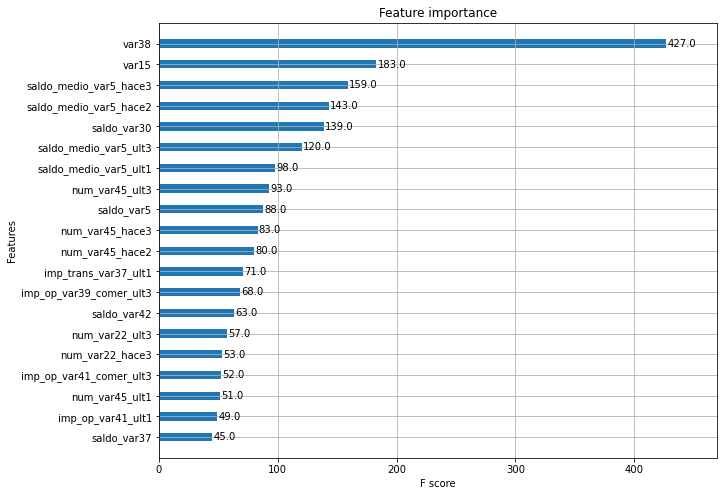

In [36]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

## LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [38]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

evals = [(x_test, y_test)]
lgbm_clf.fit(x_train, y_train, early_stopping_rounds=100, eval_metric = "auc",
            eval_set = evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(x_test)[:,1],average="macro")
print("ROC AUC : {0:.4f}".format(lgbm_roc_score))

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.795963	valid_0's binary_logloss: 0.159288
[2]	valid_0's auc: 0.801789	valid_0's binary_logloss: 0.155038
[3]	valid_0's auc: 0.803367	valid_0's binary_logloss: 0.15185
[4]	valid_0's auc: 0.805168	valid_0's binary_logloss: 0.14961
[5]	valid_0's auc: 0.809401	valid_0's binary_logloss: 0.147695
[6]	valid_0's auc: 0.810671	valid_0's binary_logloss: 0.146234
[7]	valid_0's auc: 0.815356	valid_0's binary_logloss: 0.144877
[8]	valid_0's auc: 0.816777	valid_0's binary_logloss: 0.143783
[9]	valid_0's auc: 0.817821	valid_0's binary_logloss: 0.143084
[10]	valid_0's auc: 0.818637	valid_0's binary_logloss: 0.142272
[11]	valid_0's auc: 0.81939	valid_0's binary_logloss: 0.141623
[12]	valid_0's auc: 0.821106	valid_0's binary_logloss: 0.141043
[13]	valid_0's auc: 0.822008	valid_0's binary_logloss: 0.140628
[14]	valid_0's auc: 0.822584	valid_0's binary_logloss: 0.140198
[15]	valid_0's auc: 0.822291	valid_0's binary_logloss: 0.139909
[16]	valid_0's auc: 0.821862	valid_0's binary_loglos

[138]	valid_0's auc: 0.811442	valid_0's binary_logloss: 0.141896
[139]	valid_0's auc: 0.811524	valid_0's binary_logloss: 0.141931
[140]	valid_0's auc: 0.811309	valid_0's binary_logloss: 0.142004
[141]	valid_0's auc: 0.811321	valid_0's binary_logloss: 0.142035
[142]	valid_0's auc: 0.811275	valid_0's binary_logloss: 0.142077
[143]	valid_0's auc: 0.811453	valid_0's binary_logloss: 0.142082
ROC AUC : 0.8239


In [39]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves' : [32,64],
          'max_depth' : [128,160],
          'min_child_samples' : [60,100],
          'subsample' : [0.8,1]
         }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(x_train, y_train, early_stopping_rounds = 30, eval_metric="auc",
          eval_set=[(x_train,y_train),(x_test,y_test)])

print('GridSearchCV최적 파라미터', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:,1], average="macro")
print("ROC AUC : {0:4f}".format(lgbm_roc_score))

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.817978	valid_1's binary_logloss: 0.143581
[9]	valid_0's auc: 0.8534

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	valid_0's binary_logloss: 0.142368	valid_1's auc: 0.809445	valid_1's binary_logloss: 0.147536
[6]	valid_0's auc: 0.851777	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.815523	valid_1's binary_logloss: 0.146081
[7]	valid_0's auc: 0.853084	valid_0's binary_logloss: 0.138412	valid_1's auc: 0.815703	valid_1's binary_logloss: 0.144756
[8]	valid_0's auc: 0.85451	valid_0's binary_logloss: 0.136843	valid_1's auc: 0.818057	valid_1's binary_logloss: 0.14363
[9]	valid_0's auc: 0.855518

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826568	valid_0's binary_logloss: 0.157307	valid_1's auc: 0.798542	valid_1's binary_logloss: 0.158805
[2]	valid_0's auc: 0.832329	valid_0's binary_logloss: 0.151856	valid_1's auc: 0.801527	valid_1's binary_logloss: 0.154327
[3]	valid_0's auc: 0.838422	valid_0's binary_logloss: 0.147896	valid_1's auc: 0.806817	valid_1's binary_logloss: 0.151202
[4]	valid_0's auc: 0.845848	valid_0's binary_logloss: 0.144769	valid_1's auc: 0.81728	valid_1's binary_logloss: 0.148596
[5]	valid_0's auc: 0.849247	valid_0's binary_logloss: 0.142212	valid_1's auc: 0.819951	valid_1's binary_logloss: 0.146579
[6]	valid_0's auc: 0.850669	valid_0's binary_logloss: 0.140116	valid_1's auc: 0.818982	valid_1's binary_logloss: 0.145137
[7]	valid_0's auc: 0.853091	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.821526	valid_1's binary_logloss: 0.143781
[8]	valid_0's auc: 0.855444	valid_0's binary_logloss: 0.136801	valid_1's auc: 0.822315	valid_1's binary_logloss: 0.142784
[9]	valid_0's auc: 0.8575

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.82698	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.793346	valid_1's binary_logloss: 0.15932
[2]	valid_0's auc: 0.834558	valid_0's binary_logloss: 0.1519	valid_1's auc: 0.800348	valid_1's binary_logloss: 0.154908
[3]	valid_0's auc: 0.837613	valid_0's binary_logloss: 0.147904	valid_1's auc: 0.803431	valid_1's binary_logloss: 0.151786
[4]	valid_0's auc: 0.841604	valid_0's binary_logloss: 0.144682	valid_1's auc: 0.807225	valid_1's binary_logloss: 0.149285
[5]	valid_0's auc: 0.846168	valid_0's binary_logloss: 0.142127	valid_1's auc: 0.813036	valid_1's binary_logloss: 0.147374
[6]	valid_0's auc: 0.848077	valid_0's binary_logloss: 0.1401	valid_1's auc: 0.81443	valid_1's binary_logloss: 0.145915
[7]	valid_0's auc: 0.850846	valid_0's binary_logloss: 0.138308	valid_1's auc: 0.815516	valid_1's binary_logloss: 0.144635
[8]	valid_0's auc: 0.853214	valid_0's binary_logloss: 0.136801	valid_1's auc: 0.817589	valid_1's binary_logloss: 0.143561
[9]	valid_0's auc: 0.854557	val

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828881	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.797399	valid_1's binary_logloss: 0.159359
[2]	valid_0's auc: 0.837469	valid_0's binary_logloss: 0.15189	valid_1's auc: 0.802516	valid_1's binary_logloss: 0.155006
[3]	valid_0's auc: 0.842051	valid_0's binary_logloss: 0.147914	valid_1's auc: 0.807272	valid_1's binary_logloss: 0.151771
[4]	valid_0's auc: 0.845212	valid_0's binary_logloss: 0.144836	valid_1's auc: 0.810277	valid_1's binary_logloss: 0.149384
[5]	valid_0's auc: 0.850439	valid_0's binary_logloss: 0.142198	valid_1's auc: 0.814093	valid_1's binary_logloss: 0.147502
[6]	valid_0's auc: 0.852254	valid_0's binary_logloss: 0.140094	valid_1's auc: 0.814639	valid_1's binary_logloss: 0.146019
[7]	valid_0's auc: 0.853913	valid_0's binary_logloss: 0.13834	valid_1's auc: 0.816636	valid_1's binary_logloss: 0.144661
[8]	valid_0's auc: 0.855048	valid_0's binary_logloss: 0.13688	valid_1's auc: 0.817545	valid_1's binary_logloss: 0.14369
[9]	valid_0's auc: 0.856809	

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.817978	valid_1's binary_logloss: 0.143581
[9]	valid_0's auc: 0.8534

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	valid_0's binary_logloss: 0.142368	valid_1's auc: 0.809445	valid_1's binary_logloss: 0.147536
[6]	valid_0's auc: 0.851777	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.815523	valid_1's binary_logloss: 0.146081
[7]	valid_0's auc: 0.853084	valid_0's binary_logloss: 0.138412	valid_1's auc: 0.815703	valid_1's binary_logloss: 0.144756
[8]	valid_0's auc: 0.85451	valid_0's binary_logloss: 0.136843	valid_1's auc: 0.818057	valid_1's binary_logloss: 0.14363
[9]	valid_0's auc: 0.855518

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826568	valid_0's binary_logloss: 0.157307	valid_1's auc: 0.798542	valid_1's binary_logloss: 0.158805
[2]	valid_0's auc: 0.832329	valid_0's binary_logloss: 0.151856	valid_1's auc: 0.801527	valid_1's binary_logloss: 0.154327
[3]	valid_0's auc: 0.838422	valid_0's binary_logloss: 0.147896	valid_1's auc: 0.806817	valid_1's binary_logloss: 0.151202
[4]	valid_0's auc: 0.845848	valid_0's binary_logloss: 0.144769	valid_1's auc: 0.81728	valid_1's binary_logloss: 0.148596
[5]	valid_0's auc: 0.849247	valid_0's binary_logloss: 0.142212	valid_1's auc: 0.819951	valid_1's binary_logloss: 0.146579
[6]	valid_0's auc: 0.850669	valid_0's binary_logloss: 0.140116	valid_1's auc: 0.818982	valid_1's binary_logloss: 0.145137
[7]	valid_0's auc: 0.853091	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.821526	valid_1's binary_logloss: 0.143781
[8]	valid_0's auc: 0.855444	valid_0's binary_logloss: 0.136801	valid_1's auc: 0.822315	valid_1's binary_logloss: 0.142784
[9]	valid_0's auc: 0.8575

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.82698	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.793346	valid_1's binary_logloss: 0.15932
[2]	valid_0's auc: 0.834558	valid_0's binary_logloss: 0.1519	valid_1's auc: 0.800348	valid_1's binary_logloss: 0.154908
[3]	valid_0's auc: 0.837613	valid_0's binary_logloss: 0.147904	valid_1's auc: 0.803431	valid_1's binary_logloss: 0.151786
[4]	valid_0's auc: 0.841604	valid_0's binary_logloss: 0.144682	valid_1's auc: 0.807225	valid_1's binary_logloss: 0.149285
[5]	valid_0's auc: 0.846168	valid_0's binary_logloss: 0.142127	valid_1's auc: 0.813036	valid_1's binary_logloss: 0.147374
[6]	valid_0's auc: 0.848077	valid_0's binary_logloss: 0.1401	valid_1's auc: 0.81443	valid_1's binary_logloss: 0.145915
[7]	valid_0's auc: 0.850846	valid_0's binary_logloss: 0.138308	valid_1's auc: 0.815516	valid_1's binary_logloss: 0.144635
[8]	valid_0's auc: 0.853214	valid_0's binary_logloss: 0.136801	valid_1's auc: 0.817589	valid_1's binary_logloss: 0.143561
[9]	valid_0's auc: 0.854557	val

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828881	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.797399	valid_1's binary_logloss: 0.159359
[2]	valid_0's auc: 0.837469	valid_0's binary_logloss: 0.15189	valid_1's auc: 0.802516	valid_1's binary_logloss: 0.155006
[3]	valid_0's auc: 0.842051	valid_0's binary_logloss: 0.147914	valid_1's auc: 0.807272	valid_1's binary_logloss: 0.151771
[4]	valid_0's auc: 0.845212	valid_0's binary_logloss: 0.144836	valid_1's auc: 0.810277	valid_1's binary_logloss: 0.149384
[5]	valid_0's auc: 0.850439	valid_0's binary_logloss: 0.142198	valid_1's auc: 0.814093	valid_1's binary_logloss: 0.147502
[6]	valid_0's auc: 0.852254	valid_0's binary_logloss: 0.140094	valid_1's auc: 0.814639	valid_1's binary_logloss: 0.146019
[7]	valid_0's auc: 0.853913	valid_0's binary_logloss: 0.13834	valid_1's auc: 0.816636	valid_1's binary_logloss: 0.144661
[8]	valid_0's auc: 0.855048	valid_0's binary_logloss: 0.13688	valid_1's auc: 0.817545	valid_1's binary_logloss: 0.14369
[9]	valid_0's auc: 0.856809	

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.837259	valid_0's binary_logloss: 0.156538	valid_1's auc: 0.798773	valid_1's binary_logloss: 0.158999
[2]	valid_0's auc: 0.844407	valid_0's binary_logloss: 0.1505	valid_1's auc: 0.805122	valid_1's binary_logloss: 0.154547
[3]	valid_0's auc: 0.850207	valid_0's binary_logloss: 0.146115	valid_1's auc: 0.809928	valid_1's binary_logloss: 0.151137
[4]	valid_0's auc: 0.854764	valid_0's binary_logloss: 0.142775	valid_1's auc: 0.81512	valid_1's binary_logloss: 0.148713
[5]	valid_0's auc: 0.859871	valid_0's binary_logloss: 0.13992	valid_1's auc: 0.81918	valid_1's binary_logloss: 0.146851
[6]	valid_0's auc: 0.863421	valid_0's binary_logloss: 0.137591	valid_1's auc: 0.821405	valid_1's binary_logloss: 0.145224
[7]	valid_0's auc: 0.865478	valid_0's binary_logloss: 0.135594	valid_1's auc: 0.821612	valid_1's binary_logloss: 0.144027
[8]	valid_0's auc: 0.867356	valid_0's binary_logloss: 0.133895	valid_1's auc: 0.821172	valid_1's binary_logloss: 0.143113
[9]	valid_0's auc: 0.869087	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.156596	valid_1's auc: 0.790539	valid_1's binary_logloss: 0.15907
[2]	valid_0's auc: 0.840398	valid_0's binary_logloss: 0.150628	valid_1's auc: 0.804101	valid_1's binary_logloss: 0.15446
[3]	valid_0's auc: 0.849115	valid_0's binary_logloss: 0.146268	valid_1's auc: 0.805293	valid_1's binary_logloss: 0.151322
[4]	valid_0's auc: 0.857857	valid_0's binary_logloss: 0.142781	valid_1's auc: 0.812902	valid_1's binary_logloss: 0.14879
[5]	valid_0's auc: 0.862018	valid_0's binary_logloss: 0.139959	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.14698
[6]	valid_0's auc: 0.864473	valid_0's binary_logloss: 0.137534	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.145323
[7]	valid_0's auc: 0.866743	valid_0's binary_logloss: 0.135504	valid_1's auc: 0.820643	valid_1's binary_logloss: 0.143992
[8]	valid_0's auc: 0.868891	valid_0's binary_logloss: 0.133816	valid_1's auc: 0.820858	valid_1's binary_logloss: 0.142993
[9]	valid_0's auc: 0.871061	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.836973	valid_0's binary_logloss: 0.156558	valid_1's auc: 0.804921	valid_1's binary_logloss: 0.158585
[2]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.150569	valid_1's auc: 0.808966	valid_1's binary_logloss: 0.153823
[3]	valid_0's auc: 0.851798	valid_0's binary_logloss: 0.146224	valid_1's auc: 0.817038	valid_1's binary_logloss: 0.150485
[4]	valid_0's auc: 0.85721	valid_0's binary_logloss: 0.142803	valid_1's auc: 0.818058	valid_1's binary_logloss: 0.147969
[5]	valid_0's auc: 0.862272	valid_0's binary_logloss: 0.139966	valid_1's auc: 0.81921	valid_1's binary_logloss: 0.14612
[6]	valid_0's auc: 0.8641	valid_0's binary_logloss: 0.137635	valid_1's auc: 0.818858	valid_1's binary_logloss: 0.144526
[7]	valid_0's auc: 0.867403	valid_0's binary_logloss: 0.135643	valid_1's auc: 0.821163	valid_1's binary_logloss: 0.143227
[8]	valid_0's auc: 0.869312	valid_0's binary_logloss: 0.133962	valid_1's auc: 0.822191	valid_1's binary_logloss: 0.142144
[9]	valid_0's auc: 0.871504	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.799185	valid_1's binary_logloss: 0.158902
[2]	valid_0's auc: 0.846591	valid_0's binary_logloss: 0.150596	valid_1's auc: 0.804786	valid_1's binary_logloss: 0.154475
[3]	valid_0's auc: 0.849399	valid_0's binary_logloss: 0.146282	valid_1's auc: 0.805811	valid_1's binary_logloss: 0.151359
[4]	valid_0's auc: 0.854401	valid_0's binary_logloss: 0.142822	valid_1's auc: 0.811795	valid_1's binary_logloss: 0.148927
[5]	valid_0's auc: 0.860493	valid_0's binary_logloss: 0.140053	valid_1's auc: 0.816461	valid_1's binary_logloss: 0.147006
[6]	valid_0's auc: 0.862655	valid_0's binary_logloss: 0.137752	valid_1's auc: 0.815659	valid_1's binary_logloss: 0.145651
[7]	valid_0's auc: 0.866989	valid_0's binary_logloss: 0.135785	valid_1's auc: 0.817794	valid_1's binary_logloss: 0.144323
[8]	valid_0's auc: 0.868831	valid_0's binary_logloss: 0.13407	valid_1's auc: 0.81809	valid_1's binary_logloss: 0.143299
[9]	valid_0's auc: 0.870947

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.820114	valid_1's binary_logloss: 0.143093
[9]	valid_0's auc: 0.8699

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.837259	valid_0's binary_logloss: 0.156538	valid_1's auc: 0.798773	valid_1's binary_logloss: 0.158999
[2]	valid_0's auc: 0.844407	valid_0's binary_logloss: 0.1505	valid_1's auc: 0.805122	valid_1's binary_logloss: 0.154547
[3]	valid_0's auc: 0.850207	valid_0's binary_logloss: 0.146115	valid_1's auc: 0.809928	valid_1's binary_logloss: 0.151137
[4]	valid_0's auc: 0.854764	valid_0's binary_logloss: 0.142775	valid_1's auc: 0.81512	valid_1's binary_logloss: 0.148713
[5]	valid_0's auc: 0.859871	valid_0's binary_logloss: 0.13992	valid_1's auc: 0.81918	valid_1's binary_logloss: 0.146851
[6]	valid_0's auc: 0.863421	valid_0's binary_logloss: 0.137591	valid_1's auc: 0.821405	valid_1's binary_logloss: 0.145224
[7]	valid_0's auc: 0.865478	valid_0's binary_logloss: 0.135594	valid_1's auc: 0.821612	valid_1's binary_logloss: 0.144027
[8]	valid_0's auc: 0.867356	valid_0's binary_logloss: 0.133895	valid_1's auc: 0.821172	valid_1's binary_logloss: 0.143113
[9]	valid_0's auc: 0.869087	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.156596	valid_1's auc: 0.790539	valid_1's binary_logloss: 0.15907
[2]	valid_0's auc: 0.840398	valid_0's binary_logloss: 0.150628	valid_1's auc: 0.804101	valid_1's binary_logloss: 0.15446
[3]	valid_0's auc: 0.849115	valid_0's binary_logloss: 0.146268	valid_1's auc: 0.805293	valid_1's binary_logloss: 0.151322
[4]	valid_0's auc: 0.857857	valid_0's binary_logloss: 0.142781	valid_1's auc: 0.812902	valid_1's binary_logloss: 0.14879
[5]	valid_0's auc: 0.862018	valid_0's binary_logloss: 0.139959	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.14698
[6]	valid_0's auc: 0.864473	valid_0's binary_logloss: 0.137534	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.145323
[7]	valid_0's auc: 0.866743	valid_0's binary_logloss: 0.135504	valid_1's auc: 0.820643	valid_1's binary_logloss: 0.143992
[8]	valid_0's auc: 0.868891	valid_0's binary_logloss: 0.133816	valid_1's auc: 0.820858	valid_1's binary_logloss: 0.142993
[9]	valid_0's auc: 0.871061	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.836973	valid_0's binary_logloss: 0.156558	valid_1's auc: 0.804921	valid_1's binary_logloss: 0.158585
[2]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.150569	valid_1's auc: 0.808966	valid_1's binary_logloss: 0.153823
[3]	valid_0's auc: 0.851798	valid_0's binary_logloss: 0.146224	valid_1's auc: 0.817038	valid_1's binary_logloss: 0.150485
[4]	valid_0's auc: 0.85721	valid_0's binary_logloss: 0.142803	valid_1's auc: 0.818058	valid_1's binary_logloss: 0.147969
[5]	valid_0's auc: 0.862272	valid_0's binary_logloss: 0.139966	valid_1's auc: 0.81921	valid_1's binary_logloss: 0.14612
[6]	valid_0's auc: 0.8641	valid_0's binary_logloss: 0.137635	valid_1's auc: 0.818858	valid_1's binary_logloss: 0.144526
[7]	valid_0's auc: 0.867403	valid_0's binary_logloss: 0.135643	valid_1's auc: 0.821163	valid_1's binary_logloss: 0.143227
[8]	valid_0's auc: 0.869312	valid_0's binary_logloss: 0.133962	valid_1's auc: 0.822191	valid_1's binary_logloss: 0.142144
[9]	valid_0's auc: 0.871504	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.799185	valid_1's binary_logloss: 0.158902
[2]	valid_0's auc: 0.846591	valid_0's binary_logloss: 0.150596	valid_1's auc: 0.804786	valid_1's binary_logloss: 0.154475
[3]	valid_0's auc: 0.849399	valid_0's binary_logloss: 0.146282	valid_1's auc: 0.805811	valid_1's binary_logloss: 0.151359
[4]	valid_0's auc: 0.854401	valid_0's binary_logloss: 0.142822	valid_1's auc: 0.811795	valid_1's binary_logloss: 0.148927
[5]	valid_0's auc: 0.860493	valid_0's binary_logloss: 0.140053	valid_1's auc: 0.816461	valid_1's binary_logloss: 0.147006
[6]	valid_0's auc: 0.862655	valid_0's binary_logloss: 0.137752	valid_1's auc: 0.815659	valid_1's binary_logloss: 0.145651
[7]	valid_0's auc: 0.866989	valid_0's binary_logloss: 0.135785	valid_1's auc: 0.817794	valid_1's binary_logloss: 0.144323
[8]	valid_0's auc: 0.868831	valid_0's binary_logloss: 0.13407	valid_1's auc: 0.81809	valid_1's binary_logloss: 0.143299
[9]	valid_0's auc: 0.870947

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.820114	valid_1's binary_logloss: 0.143093
[9]	valid_0's auc: 0.8699

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.825154	valid_0's binary_logloss: 0.157511	valid_1's auc: 0.795875	valid_1's binary_logloss: 0.159213
[2]	valid_0's auc: 0.833632	valid_0's binary_logloss: 0.152101	valid_1's auc: 0.801478	valid_1's binary_logloss: 0.154832
[3]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.148155	valid_1's auc: 0.804182	valid_1's binary_logloss: 0.151829
[4]	valid_0's auc: 0.840565	valid_0's binary_logloss: 0.145049	valid_1's auc: 0.806609	valid_1's binary_logloss: 0.149469
[5]	valid_0's auc: 0.846198	valid_0's binary_logloss: 0.142498	valid_1's auc: 0.813041	valid_1's binary_logloss: 0.147555
[6]	valid_0's auc: 0.849473	valid_0's binary_logloss: 0.140396	valid_1's auc: 0.816203	valid_1's binary_logloss: 0.145877
[7]	valid_0's auc: 0.850209	valid_0's binary_logloss: 0.138654	valid_1's auc: 0.817263	valid_1's binary_logloss: 0.144575
[8]	valid_0's auc: 0.851251	valid_0's binary_logloss: 0.137213	valid_1's auc: 0.818045	valid_1's binary_logloss: 0.143505
[9]	valid_0's auc: 0.852

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.848543	valid_0's binary_logloss: 0.142591	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.147377
[6]	valid_0's auc: 0.850894	valid_0's binary_logloss: 0.140512	valid_1's auc: 0.815938	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.852272	valid_0's binary_logloss: 0.138757	valid_1's auc: 0.817141	valid_1's binary_logloss: 0.144526
[8]	valid_0's auc: 0.85338	valid_0's binary_logloss: 0.137261	valid_1's auc: 0.817326	valid_1's binary_logloss: 0.143444
[9]	valid_0's auc: 0.855643

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827062	valid_0's binary_logloss: 0.157448	valid_1's auc: 0.797806	valid_1's binary_logloss: 0.159174
[2]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.151929	valid_1's auc: 0.802902	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.808076	valid_1's binary_logloss: 0.151588
[4]	valid_0's auc: 0.844972	valid_0's binary_logloss: 0.144961	valid_1's auc: 0.811943	valid_1's binary_logloss: 0.149186
[5]	valid_0's auc: 0.849807	valid_0's binary_logloss: 0.142411	valid_1's auc: 0.815658	valid_1's binary_logloss: 0.147152
[6]	valid_0's auc: 0.852665	valid_0's binary_logloss: 0.140305	valid_1's auc: 0.819236	valid_1's binary_logloss: 0.145502
[7]	valid_0's auc: 0.85479	valid_0's binary_logloss: 0.138545	valid_1's auc: 0.820588	valid_1's binary_logloss: 0.144309
[8]	valid_0's auc: 0.856055	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.820803	valid_1's binary_logloss: 0.143182
[9]	valid_0's auc: 0.8571

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831727	valid_0's binary_logloss: 0.157565	valid_1's auc: 0.80014	valid_1's binary_logloss: 0.159252
[2]	valid_0's auc: 0.83493	valid_0's binary_logloss: 0.152121	valid_1's auc: 0.801462	valid_1's binary_logloss: 0.154971
[3]	valid_0's auc: 0.837394	valid_0's binary_logloss: 0.148128	valid_1's auc: 0.803952	valid_1's binary_logloss: 0.151796
[4]	valid_0's auc: 0.842068	valid_0's binary_logloss: 0.144995	valid_1's auc: 0.808922	valid_1's binary_logloss: 0.149367
[5]	valid_0's auc: 0.847799	valid_0's binary_logloss: 0.142476	valid_1's auc: 0.814337	valid_1's binary_logloss: 0.14736
[6]	valid_0's auc: 0.848711	valid_0's binary_logloss: 0.140413	valid_1's auc: 0.816749	valid_1's binary_logloss: 0.145697
[7]	valid_0's auc: 0.850742	valid_0's binary_logloss: 0.138701	valid_1's auc: 0.816774	valid_1's binary_logloss: 0.144523
[8]	valid_0's auc: 0.853614	valid_0's binary_logloss: 0.137156	valid_1's auc: 0.81757	valid_1's binary_logloss: 0.14348
[9]	valid_0's auc: 0.855703	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829166	valid_0's binary_logloss: 0.157516	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.159313
[2]	valid_0's auc: 0.839438	valid_0's binary_logloss: 0.152012	valid_1's auc: 0.805567	valid_1's binary_logloss: 0.154976
[3]	valid_0's auc: 0.842527	valid_0's binary_logloss: 0.148117	valid_1's auc: 0.810967	valid_1's binary_logloss: 0.151754
[4]	valid_0's auc: 0.844429	valid_0's binary_logloss: 0.14509	valid_1's auc: 0.814051	valid_1's binary_logloss: 0.149222
[5]	valid_0's auc: 0.849387	valid_0's binary_logloss: 0.142533	valid_1's auc: 0.815985	valid_1's binary_logloss: 0.147271
[6]	valid_0's auc: 0.852781	valid_0's binary_logloss: 0.140448	valid_1's auc: 0.818833	valid_1's binary_logloss: 0.145731
[7]	valid_0's auc: 0.854046	valid_0's binary_logloss: 0.138708	valid_1's auc: 0.818947	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.854765	valid_0's binary_logloss: 0.137247	valid_1's auc: 0.819123	valid_1's binary_logloss: 0.143452
[9]	valid_0's auc: 0.8553

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.825154	valid_0's binary_logloss: 0.157511	valid_1's auc: 0.795875	valid_1's binary_logloss: 0.159213
[2]	valid_0's auc: 0.833632	valid_0's binary_logloss: 0.152101	valid_1's auc: 0.801478	valid_1's binary_logloss: 0.154832
[3]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.148155	valid_1's auc: 0.804182	valid_1's binary_logloss: 0.151829
[4]	valid_0's auc: 0.840565	valid_0's binary_logloss: 0.145049	valid_1's auc: 0.806609	valid_1's binary_logloss: 0.149469
[5]	valid_0's auc: 0.846198	valid_0's binary_logloss: 0.142498	valid_1's auc: 0.813041	valid_1's binary_logloss: 0.147555
[6]	valid_0's auc: 0.849473	valid_0's binary_logloss: 0.140396	valid_1's auc: 0.816203	valid_1's binary_logloss: 0.145877
[7]	valid_0's auc: 0.850209	valid_0's binary_logloss: 0.138654	valid_1's auc: 0.817263	valid_1's binary_logloss: 0.144575
[8]	valid_0's auc: 0.851251	valid_0's binary_logloss: 0.137213	valid_1's auc: 0.818045	valid_1's binary_logloss: 0.143505
[9]	valid_0's auc: 0.852

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.848543	valid_0's binary_logloss: 0.142591	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.147377
[6]	valid_0's auc: 0.850894	valid_0's binary_logloss: 0.140512	valid_1's auc: 0.815938	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.852272	valid_0's binary_logloss: 0.138757	valid_1's auc: 0.817141	valid_1's binary_logloss: 0.144526
[8]	valid_0's auc: 0.85338	valid_0's binary_logloss: 0.137261	valid_1's auc: 0.817326	valid_1's binary_logloss: 0.143444
[9]	valid_0's auc: 0.855643

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827062	valid_0's binary_logloss: 0.157448	valid_1's auc: 0.797806	valid_1's binary_logloss: 0.159174
[2]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.151929	valid_1's auc: 0.802902	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.808076	valid_1's binary_logloss: 0.151588
[4]	valid_0's auc: 0.844972	valid_0's binary_logloss: 0.144961	valid_1's auc: 0.811943	valid_1's binary_logloss: 0.149186
[5]	valid_0's auc: 0.849807	valid_0's binary_logloss: 0.142411	valid_1's auc: 0.815658	valid_1's binary_logloss: 0.147152
[6]	valid_0's auc: 0.852665	valid_0's binary_logloss: 0.140305	valid_1's auc: 0.819236	valid_1's binary_logloss: 0.145502
[7]	valid_0's auc: 0.85479	valid_0's binary_logloss: 0.138545	valid_1's auc: 0.820588	valid_1's binary_logloss: 0.144309
[8]	valid_0's auc: 0.856055	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.820803	valid_1's binary_logloss: 0.143182
[9]	valid_0's auc: 0.8571

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831727	valid_0's binary_logloss: 0.157565	valid_1's auc: 0.80014	valid_1's binary_logloss: 0.159252
[2]	valid_0's auc: 0.83493	valid_0's binary_logloss: 0.152121	valid_1's auc: 0.801462	valid_1's binary_logloss: 0.154971
[3]	valid_0's auc: 0.837394	valid_0's binary_logloss: 0.148128	valid_1's auc: 0.803952	valid_1's binary_logloss: 0.151796
[4]	valid_0's auc: 0.842068	valid_0's binary_logloss: 0.144995	valid_1's auc: 0.808922	valid_1's binary_logloss: 0.149367
[5]	valid_0's auc: 0.847799	valid_0's binary_logloss: 0.142476	valid_1's auc: 0.814337	valid_1's binary_logloss: 0.14736
[6]	valid_0's auc: 0.848711	valid_0's binary_logloss: 0.140413	valid_1's auc: 0.816749	valid_1's binary_logloss: 0.145697
[7]	valid_0's auc: 0.850742	valid_0's binary_logloss: 0.138701	valid_1's auc: 0.816774	valid_1's binary_logloss: 0.144523
[8]	valid_0's auc: 0.853614	valid_0's binary_logloss: 0.137156	valid_1's auc: 0.81757	valid_1's binary_logloss: 0.14348
[9]	valid_0's auc: 0.855703	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829166	valid_0's binary_logloss: 0.157516	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.159313
[2]	valid_0's auc: 0.839438	valid_0's binary_logloss: 0.152012	valid_1's auc: 0.805567	valid_1's binary_logloss: 0.154976
[3]	valid_0's auc: 0.842527	valid_0's binary_logloss: 0.148117	valid_1's auc: 0.810967	valid_1's binary_logloss: 0.151754
[4]	valid_0's auc: 0.844429	valid_0's binary_logloss: 0.14509	valid_1's auc: 0.814051	valid_1's binary_logloss: 0.149222
[5]	valid_0's auc: 0.849387	valid_0's binary_logloss: 0.142533	valid_1's auc: 0.815985	valid_1's binary_logloss: 0.147271
[6]	valid_0's auc: 0.852781	valid_0's binary_logloss: 0.140448	valid_1's auc: 0.818833	valid_1's binary_logloss: 0.145731
[7]	valid_0's auc: 0.854046	valid_0's binary_logloss: 0.138708	valid_1's auc: 0.818947	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.854765	valid_0's binary_logloss: 0.137247	valid_1's auc: 0.819123	valid_1's binary_logloss: 0.143452
[9]	valid_0's auc: 0.8553

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_logloss: 0.144111
[8]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.134827	valid_1's auc: 0.821478	valid_1's binary_logloss: 0.143045
[9]	valid_0's auc: 0.866538	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	valid_1's binary_logloss: 0.143151
[9]	valid_0's auc: 0.869037	va

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838623	valid_0's binary_logloss: 0.156897	valid_1's auc: 0.803869	valid_1's binary_logloss: 0.158899
[2]	valid_0's auc: 0.847559	valid_0's binary_logloss: 0.151038	valid_1's auc: 0.813424	valid_1's binary_logloss: 0.154374
[3]	valid_0's auc: 0.852063	valid_0's binary_logloss: 0.146844	valid_1's auc: 0.811256	valid_1's binary_logloss: 0.151098
[4]	valid_0's auc: 0.85832	valid_0's binary_logloss: 0.143481	valid_1's auc: 0.817262	valid_1's binary_logloss: 0.14848
[5]	valid_0's auc: 0.861332	valid_0's binary_logloss: 0.140727	valid_1's auc: 0.818628	valid_1's binary_logloss: 0.14638
[6]	valid_0's auc: 0.862838	valid_0's binary_logloss: 0.138451	valid_1's auc: 0.818204	valid_1's binary_logloss: 0.14479
[7]	valid_0's auc: 0.864798	valid_0's binary_logloss: 0.136534	valid_1's auc: 0.821027	valid_1's binary_logloss: 0.143518
[8]	valid_0's auc: 0.86623	valid_0's binary_logloss: 0.13486	valid_1's auc: 0.822014	valid_1's binary_logloss: 0.142444
[9]	valid_0's auc: 0.868764	va

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.839722	valid_0's binary_logloss: 0.156971	valid_1's auc: 0.798273	valid_1's binary_logloss: 0.159001
[2]	valid_0's auc: 0.846106	valid_0's binary_logloss: 0.151102	valid_1's auc: 0.806378	valid_1's binary_logloss: 0.154658
[3]	valid_0's auc: 0.851603	valid_0's binary_logloss: 0.146802	valid_1's auc: 0.808815	valid_1's binary_logloss: 0.15143
[4]	valid_0's auc: 0.856899	valid_0's binary_logloss: 0.143427	valid_1's auc: 0.815423	valid_1's binary_logloss: 0.14883
[5]	valid_0's auc: 0.860628	valid_0's binary_logloss: 0.140657	valid_1's auc: 0.819314	valid_1's binary_logloss: 0.146819
[6]	valid_0's auc: 0.863592	valid_0's binary_logloss: 0.138386	valid_1's auc: 0.818091	valid_1's binary_logloss: 0.14529
[7]	valid_0's auc: 0.866094	valid_0's binary_logloss: 0.136472	valid_1's auc: 0.819663	valid_1's binary_logloss: 0.144006
[8]	valid_0's auc: 0.868319	valid_0's binary_logloss: 0.134804	valid_1's auc: 0.819774	valid_1's binary_logloss: 0.143021
[9]	valid_0's auc: 0.869683

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842706	valid_0's binary_logloss: 0.156824	valid_1's auc: 0.806363	valid_1's binary_logloss: 0.15901
[2]	valid_0's auc: 0.849573	valid_0's binary_logloss: 0.150963	valid_1's auc: 0.808979	valid_1's binary_logloss: 0.1545
[3]	valid_0's auc: 0.852339	valid_0's binary_logloss: 0.146721	valid_1's auc: 0.812761	valid_1's binary_logloss: 0.151182
[4]	valid_0's auc: 0.856319	valid_0's binary_logloss: 0.143343	valid_1's auc: 0.81482	valid_1's binary_logloss: 0.148883
[5]	valid_0's auc: 0.859446	valid_0's binary_logloss: 0.140668	valid_1's auc: 0.817207	valid_1's binary_logloss: 0.146982
[6]	valid_0's auc: 0.862561	valid_0's binary_logloss: 0.138381	valid_1's auc: 0.818624	valid_1's binary_logloss: 0.145535
[7]	valid_0's auc: 0.86502	valid_0's binary_logloss: 0.136469	valid_1's auc: 0.819366	valid_1's binary_logloss: 0.144367
[8]	valid_0's auc: 0.86697	valid_0's binary_logloss: 0.134802	valid_1's auc: 0.818629	valid_1's binary_logloss: 0.143439
[9]	valid_0's auc: 0.868077	va

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_logloss: 0.144111
[8]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.134827	valid_1's auc: 0.821478	valid_1's binary_logloss: 0.143045
[9]	valid_0's auc: 0.866538	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	valid_1's binary_logloss: 0.143151
[9]	valid_0's auc: 0.869037	va

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838623	valid_0's binary_logloss: 0.156897	valid_1's auc: 0.803869	valid_1's binary_logloss: 0.158899
[2]	valid_0's auc: 0.847559	valid_0's binary_logloss: 0.151038	valid_1's auc: 0.813424	valid_1's binary_logloss: 0.154374
[3]	valid_0's auc: 0.852063	valid_0's binary_logloss: 0.146844	valid_1's auc: 0.811256	valid_1's binary_logloss: 0.151098
[4]	valid_0's auc: 0.85832	valid_0's binary_logloss: 0.143481	valid_1's auc: 0.817262	valid_1's binary_logloss: 0.14848
[5]	valid_0's auc: 0.861332	valid_0's binary_logloss: 0.140727	valid_1's auc: 0.818628	valid_1's binary_logloss: 0.14638
[6]	valid_0's auc: 0.862838	valid_0's binary_logloss: 0.138451	valid_1's auc: 0.818204	valid_1's binary_logloss: 0.14479
[7]	valid_0's auc: 0.864798	valid_0's binary_logloss: 0.136534	valid_1's auc: 0.821027	valid_1's binary_logloss: 0.143518
[8]	valid_0's auc: 0.86623	valid_0's binary_logloss: 0.13486	valid_1's auc: 0.822014	valid_1's binary_logloss: 0.142444
[9]	valid_0's auc: 0.868764	va

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.839722	valid_0's binary_logloss: 0.156971	valid_1's auc: 0.798273	valid_1's binary_logloss: 0.159001
[2]	valid_0's auc: 0.846106	valid_0's binary_logloss: 0.151102	valid_1's auc: 0.806378	valid_1's binary_logloss: 0.154658
[3]	valid_0's auc: 0.851603	valid_0's binary_logloss: 0.146802	valid_1's auc: 0.808815	valid_1's binary_logloss: 0.15143
[4]	valid_0's auc: 0.856899	valid_0's binary_logloss: 0.143427	valid_1's auc: 0.815423	valid_1's binary_logloss: 0.14883
[5]	valid_0's auc: 0.860628	valid_0's binary_logloss: 0.140657	valid_1's auc: 0.819314	valid_1's binary_logloss: 0.146819
[6]	valid_0's auc: 0.863592	valid_0's binary_logloss: 0.138386	valid_1's auc: 0.818091	valid_1's binary_logloss: 0.14529
[7]	valid_0's auc: 0.866094	valid_0's binary_logloss: 0.136472	valid_1's auc: 0.819663	valid_1's binary_logloss: 0.144006
[8]	valid_0's auc: 0.868319	valid_0's binary_logloss: 0.134804	valid_1's auc: 0.819774	valid_1's binary_logloss: 0.143021
[9]	valid_0's auc: 0.869683

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842706	valid_0's binary_logloss: 0.156824	valid_1's auc: 0.806363	valid_1's binary_logloss: 0.15901
[2]	valid_0's auc: 0.849573	valid_0's binary_logloss: 0.150963	valid_1's auc: 0.808979	valid_1's binary_logloss: 0.1545
[3]	valid_0's auc: 0.852339	valid_0's binary_logloss: 0.146721	valid_1's auc: 0.812761	valid_1's binary_logloss: 0.151182
[4]	valid_0's auc: 0.856319	valid_0's binary_logloss: 0.143343	valid_1's auc: 0.81482	valid_1's binary_logloss: 0.148883
[5]	valid_0's auc: 0.859446	valid_0's binary_logloss: 0.140668	valid_1's auc: 0.817207	valid_1's binary_logloss: 0.146982
[6]	valid_0's auc: 0.862561	valid_0's binary_logloss: 0.138381	valid_1's auc: 0.818624	valid_1's binary_logloss: 0.145535
[7]	valid_0's auc: 0.86502	valid_0's binary_logloss: 0.136469	valid_1's auc: 0.819366	valid_1's binary_logloss: 0.144367
[8]	valid_0's auc: 0.86697	valid_0's binary_logloss: 0.134802	valid_1's auc: 0.818629	valid_1's binary_logloss: 0.143439
[9]	valid_0's auc: 0.868077	va

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.817978	valid_1's binary_logloss: 0.143581
[9]	valid_0's auc: 0.8534

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	valid_0's binary_logloss: 0.142368	valid_1's auc: 0.809445	valid_1's binary_logloss: 0.147536
[6]	valid_0's auc: 0.851777	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.815523	valid_1's binary_logloss: 0.146081
[7]	valid_0's auc: 0.853084	valid_0's binary_logloss: 0.138412	valid_1's auc: 0.815703	valid_1's binary_logloss: 0.144756
[8]	valid_0's auc: 0.85451	valid_0's binary_logloss: 0.136843	valid_1's auc: 0.818057	valid_1's binary_logloss: 0.14363
[9]	valid_0's auc: 0.855518

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826568	valid_0's binary_logloss: 0.157307	valid_1's auc: 0.798542	valid_1's binary_logloss: 0.158805
[2]	valid_0's auc: 0.832329	valid_0's binary_logloss: 0.151856	valid_1's auc: 0.801527	valid_1's binary_logloss: 0.154327
[3]	valid_0's auc: 0.838422	valid_0's binary_logloss: 0.147896	valid_1's auc: 0.806817	valid_1's binary_logloss: 0.151202
[4]	valid_0's auc: 0.845848	valid_0's binary_logloss: 0.144769	valid_1's auc: 0.81728	valid_1's binary_logloss: 0.148596
[5]	valid_0's auc: 0.849247	valid_0's binary_logloss: 0.142212	valid_1's auc: 0.819951	valid_1's binary_logloss: 0.146579
[6]	valid_0's auc: 0.850669	valid_0's binary_logloss: 0.140116	valid_1's auc: 0.818982	valid_1's binary_logloss: 0.145137
[7]	valid_0's auc: 0.853091	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.821526	valid_1's binary_logloss: 0.143781
[8]	valid_0's auc: 0.855444	valid_0's binary_logloss: 0.136801	valid_1's auc: 0.822315	valid_1's binary_logloss: 0.142784
[9]	valid_0's auc: 0.8575

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.82698	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.793346	valid_1's binary_logloss: 0.15932
[2]	valid_0's auc: 0.834558	valid_0's binary_logloss: 0.1519	valid_1's auc: 0.800348	valid_1's binary_logloss: 0.154908
[3]	valid_0's auc: 0.837613	valid_0's binary_logloss: 0.147904	valid_1's auc: 0.803431	valid_1's binary_logloss: 0.151786
[4]	valid_0's auc: 0.841604	valid_0's binary_logloss: 0.144682	valid_1's auc: 0.807225	valid_1's binary_logloss: 0.149285
[5]	valid_0's auc: 0.846168	valid_0's binary_logloss: 0.142127	valid_1's auc: 0.813036	valid_1's binary_logloss: 0.147374
[6]	valid_0's auc: 0.848077	valid_0's binary_logloss: 0.1401	valid_1's auc: 0.81443	valid_1's binary_logloss: 0.145915
[7]	valid_0's auc: 0.850846	valid_0's binary_logloss: 0.138308	valid_1's auc: 0.815516	valid_1's binary_logloss: 0.144635
[8]	valid_0's auc: 0.853214	valid_0's binary_logloss: 0.136801	valid_1's auc: 0.817589	valid_1's binary_logloss: 0.143561
[9]	valid_0's auc: 0.854557	val

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828881	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.797399	valid_1's binary_logloss: 0.159359
[2]	valid_0's auc: 0.837469	valid_0's binary_logloss: 0.15189	valid_1's auc: 0.802516	valid_1's binary_logloss: 0.155006
[3]	valid_0's auc: 0.842051	valid_0's binary_logloss: 0.147914	valid_1's auc: 0.807272	valid_1's binary_logloss: 0.151771
[4]	valid_0's auc: 0.845212	valid_0's binary_logloss: 0.144836	valid_1's auc: 0.810277	valid_1's binary_logloss: 0.149384
[5]	valid_0's auc: 0.850439	valid_0's binary_logloss: 0.142198	valid_1's auc: 0.814093	valid_1's binary_logloss: 0.147502
[6]	valid_0's auc: 0.852254	valid_0's binary_logloss: 0.140094	valid_1's auc: 0.814639	valid_1's binary_logloss: 0.146019
[7]	valid_0's auc: 0.853913	valid_0's binary_logloss: 0.13834	valid_1's auc: 0.816636	valid_1's binary_logloss: 0.144661
[8]	valid_0's auc: 0.855048	valid_0's binary_logloss: 0.13688	valid_1's auc: 0.817545	valid_1's binary_logloss: 0.14369
[9]	valid_0's auc: 0.856809	

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.817978	valid_1's binary_logloss: 0.143581
[9]	valid_0's auc: 0.8534

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	valid_0's binary_logloss: 0.142368	valid_1's auc: 0.809445	valid_1's binary_logloss: 0.147536
[6]	valid_0's auc: 0.851777	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.815523	valid_1's binary_logloss: 0.146081
[7]	valid_0's auc: 0.853084	valid_0's binary_logloss: 0.138412	valid_1's auc: 0.815703	valid_1's binary_logloss: 0.144756
[8]	valid_0's auc: 0.85451	valid_0's binary_logloss: 0.136843	valid_1's auc: 0.818057	valid_1's binary_logloss: 0.14363
[9]	valid_0's auc: 0.855518

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826568	valid_0's binary_logloss: 0.157307	valid_1's auc: 0.798542	valid_1's binary_logloss: 0.158805
[2]	valid_0's auc: 0.832329	valid_0's binary_logloss: 0.151856	valid_1's auc: 0.801527	valid_1's binary_logloss: 0.154327
[3]	valid_0's auc: 0.838422	valid_0's binary_logloss: 0.147896	valid_1's auc: 0.806817	valid_1's binary_logloss: 0.151202
[4]	valid_0's auc: 0.845848	valid_0's binary_logloss: 0.144769	valid_1's auc: 0.81728	valid_1's binary_logloss: 0.148596
[5]	valid_0's auc: 0.849247	valid_0's binary_logloss: 0.142212	valid_1's auc: 0.819951	valid_1's binary_logloss: 0.146579
[6]	valid_0's auc: 0.850669	valid_0's binary_logloss: 0.140116	valid_1's auc: 0.818982	valid_1's binary_logloss: 0.145137
[7]	valid_0's auc: 0.853091	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.821526	valid_1's binary_logloss: 0.143781
[8]	valid_0's auc: 0.855444	valid_0's binary_logloss: 0.136801	valid_1's auc: 0.822315	valid_1's binary_logloss: 0.142784
[9]	valid_0's auc: 0.8575

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.82698	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.793346	valid_1's binary_logloss: 0.15932
[2]	valid_0's auc: 0.834558	valid_0's binary_logloss: 0.1519	valid_1's auc: 0.800348	valid_1's binary_logloss: 0.154908
[3]	valid_0's auc: 0.837613	valid_0's binary_logloss: 0.147904	valid_1's auc: 0.803431	valid_1's binary_logloss: 0.151786
[4]	valid_0's auc: 0.841604	valid_0's binary_logloss: 0.144682	valid_1's auc: 0.807225	valid_1's binary_logloss: 0.149285
[5]	valid_0's auc: 0.846168	valid_0's binary_logloss: 0.142127	valid_1's auc: 0.813036	valid_1's binary_logloss: 0.147374
[6]	valid_0's auc: 0.848077	valid_0's binary_logloss: 0.1401	valid_1's auc: 0.81443	valid_1's binary_logloss: 0.145915
[7]	valid_0's auc: 0.850846	valid_0's binary_logloss: 0.138308	valid_1's auc: 0.815516	valid_1's binary_logloss: 0.144635
[8]	valid_0's auc: 0.853214	valid_0's binary_logloss: 0.136801	valid_1's auc: 0.817589	valid_1's binary_logloss: 0.143561
[9]	valid_0's auc: 0.854557	val

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828881	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.797399	valid_1's binary_logloss: 0.159359
[2]	valid_0's auc: 0.837469	valid_0's binary_logloss: 0.15189	valid_1's auc: 0.802516	valid_1's binary_logloss: 0.155006
[3]	valid_0's auc: 0.842051	valid_0's binary_logloss: 0.147914	valid_1's auc: 0.807272	valid_1's binary_logloss: 0.151771
[4]	valid_0's auc: 0.845212	valid_0's binary_logloss: 0.144836	valid_1's auc: 0.810277	valid_1's binary_logloss: 0.149384
[5]	valid_0's auc: 0.850439	valid_0's binary_logloss: 0.142198	valid_1's auc: 0.814093	valid_1's binary_logloss: 0.147502
[6]	valid_0's auc: 0.852254	valid_0's binary_logloss: 0.140094	valid_1's auc: 0.814639	valid_1's binary_logloss: 0.146019
[7]	valid_0's auc: 0.853913	valid_0's binary_logloss: 0.13834	valid_1's auc: 0.816636	valid_1's binary_logloss: 0.144661
[8]	valid_0's auc: 0.855048	valid_0's binary_logloss: 0.13688	valid_1's auc: 0.817545	valid_1's binary_logloss: 0.14369
[9]	valid_0's auc: 0.856809	

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.837259	valid_0's binary_logloss: 0.156538	valid_1's auc: 0.798773	valid_1's binary_logloss: 0.158999
[2]	valid_0's auc: 0.844407	valid_0's binary_logloss: 0.1505	valid_1's auc: 0.805122	valid_1's binary_logloss: 0.154547
[3]	valid_0's auc: 0.850207	valid_0's binary_logloss: 0.146115	valid_1's auc: 0.809928	valid_1's binary_logloss: 0.151137
[4]	valid_0's auc: 0.854764	valid_0's binary_logloss: 0.142775	valid_1's auc: 0.81512	valid_1's binary_logloss: 0.148713
[5]	valid_0's auc: 0.859871	valid_0's binary_logloss: 0.13992	valid_1's auc: 0.81918	valid_1's binary_logloss: 0.146851
[6]	valid_0's auc: 0.863421	valid_0's binary_logloss: 0.137591	valid_1's auc: 0.821405	valid_1's binary_logloss: 0.145224
[7]	valid_0's auc: 0.865478	valid_0's binary_logloss: 0.135594	valid_1's auc: 0.821612	valid_1's binary_logloss: 0.144027
[8]	valid_0's auc: 0.867356	valid_0's binary_logloss: 0.133895	valid_1's auc: 0.821172	valid_1's binary_logloss: 0.143113
[9]	valid_0's auc: 0.869087	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.156596	valid_1's auc: 0.790539	valid_1's binary_logloss: 0.15907
[2]	valid_0's auc: 0.840398	valid_0's binary_logloss: 0.150628	valid_1's auc: 0.804101	valid_1's binary_logloss: 0.15446
[3]	valid_0's auc: 0.849115	valid_0's binary_logloss: 0.146268	valid_1's auc: 0.805293	valid_1's binary_logloss: 0.151322
[4]	valid_0's auc: 0.857857	valid_0's binary_logloss: 0.142781	valid_1's auc: 0.812902	valid_1's binary_logloss: 0.14879
[5]	valid_0's auc: 0.862018	valid_0's binary_logloss: 0.139959	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.14698
[6]	valid_0's auc: 0.864473	valid_0's binary_logloss: 0.137534	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.145323
[7]	valid_0's auc: 0.866743	valid_0's binary_logloss: 0.135504	valid_1's auc: 0.820643	valid_1's binary_logloss: 0.143992
[8]	valid_0's auc: 0.868891	valid_0's binary_logloss: 0.133816	valid_1's auc: 0.820858	valid_1's binary_logloss: 0.142993
[9]	valid_0's auc: 0.871061	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.836973	valid_0's binary_logloss: 0.156558	valid_1's auc: 0.804921	valid_1's binary_logloss: 0.158585
[2]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.150569	valid_1's auc: 0.808966	valid_1's binary_logloss: 0.153823
[3]	valid_0's auc: 0.851798	valid_0's binary_logloss: 0.146224	valid_1's auc: 0.817038	valid_1's binary_logloss: 0.150485
[4]	valid_0's auc: 0.85721	valid_0's binary_logloss: 0.142803	valid_1's auc: 0.818058	valid_1's binary_logloss: 0.147969
[5]	valid_0's auc: 0.862272	valid_0's binary_logloss: 0.139966	valid_1's auc: 0.81921	valid_1's binary_logloss: 0.14612
[6]	valid_0's auc: 0.8641	valid_0's binary_logloss: 0.137635	valid_1's auc: 0.818858	valid_1's binary_logloss: 0.144526
[7]	valid_0's auc: 0.867403	valid_0's binary_logloss: 0.135643	valid_1's auc: 0.821163	valid_1's binary_logloss: 0.143227
[8]	valid_0's auc: 0.869312	valid_0's binary_logloss: 0.133962	valid_1's auc: 0.822191	valid_1's binary_logloss: 0.142144
[9]	valid_0's auc: 0.871504	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.799185	valid_1's binary_logloss: 0.158902
[2]	valid_0's auc: 0.846591	valid_0's binary_logloss: 0.150596	valid_1's auc: 0.804786	valid_1's binary_logloss: 0.154475
[3]	valid_0's auc: 0.849399	valid_0's binary_logloss: 0.146282	valid_1's auc: 0.805811	valid_1's binary_logloss: 0.151359
[4]	valid_0's auc: 0.854401	valid_0's binary_logloss: 0.142822	valid_1's auc: 0.811795	valid_1's binary_logloss: 0.148927
[5]	valid_0's auc: 0.860493	valid_0's binary_logloss: 0.140053	valid_1's auc: 0.816461	valid_1's binary_logloss: 0.147006
[6]	valid_0's auc: 0.862655	valid_0's binary_logloss: 0.137752	valid_1's auc: 0.815659	valid_1's binary_logloss: 0.145651
[7]	valid_0's auc: 0.866989	valid_0's binary_logloss: 0.135785	valid_1's auc: 0.817794	valid_1's binary_logloss: 0.144323
[8]	valid_0's auc: 0.868831	valid_0's binary_logloss: 0.13407	valid_1's auc: 0.81809	valid_1's binary_logloss: 0.143299
[9]	valid_0's auc: 0.870947

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.820114	valid_1's binary_logloss: 0.143093
[9]	valid_0's auc: 0.8699

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.837259	valid_0's binary_logloss: 0.156538	valid_1's auc: 0.798773	valid_1's binary_logloss: 0.158999
[2]	valid_0's auc: 0.844407	valid_0's binary_logloss: 0.1505	valid_1's auc: 0.805122	valid_1's binary_logloss: 0.154547
[3]	valid_0's auc: 0.850207	valid_0's binary_logloss: 0.146115	valid_1's auc: 0.809928	valid_1's binary_logloss: 0.151137
[4]	valid_0's auc: 0.854764	valid_0's binary_logloss: 0.142775	valid_1's auc: 0.81512	valid_1's binary_logloss: 0.148713
[5]	valid_0's auc: 0.859871	valid_0's binary_logloss: 0.13992	valid_1's auc: 0.81918	valid_1's binary_logloss: 0.146851
[6]	valid_0's auc: 0.863421	valid_0's binary_logloss: 0.137591	valid_1's auc: 0.821405	valid_1's binary_logloss: 0.145224
[7]	valid_0's auc: 0.865478	valid_0's binary_logloss: 0.135594	valid_1's auc: 0.821612	valid_1's binary_logloss: 0.144027
[8]	valid_0's auc: 0.867356	valid_0's binary_logloss: 0.133895	valid_1's auc: 0.821172	valid_1's binary_logloss: 0.143113
[9]	valid_0's auc: 0.869087	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.156596	valid_1's auc: 0.790539	valid_1's binary_logloss: 0.15907
[2]	valid_0's auc: 0.840398	valid_0's binary_logloss: 0.150628	valid_1's auc: 0.804101	valid_1's binary_logloss: 0.15446
[3]	valid_0's auc: 0.849115	valid_0's binary_logloss: 0.146268	valid_1's auc: 0.805293	valid_1's binary_logloss: 0.151322
[4]	valid_0's auc: 0.857857	valid_0's binary_logloss: 0.142781	valid_1's auc: 0.812902	valid_1's binary_logloss: 0.14879
[5]	valid_0's auc: 0.862018	valid_0's binary_logloss: 0.139959	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.14698
[6]	valid_0's auc: 0.864473	valid_0's binary_logloss: 0.137534	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.145323
[7]	valid_0's auc: 0.866743	valid_0's binary_logloss: 0.135504	valid_1's auc: 0.820643	valid_1's binary_logloss: 0.143992
[8]	valid_0's auc: 0.868891	valid_0's binary_logloss: 0.133816	valid_1's auc: 0.820858	valid_1's binary_logloss: 0.142993
[9]	valid_0's auc: 0.871061	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.836973	valid_0's binary_logloss: 0.156558	valid_1's auc: 0.804921	valid_1's binary_logloss: 0.158585
[2]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.150569	valid_1's auc: 0.808966	valid_1's binary_logloss: 0.153823
[3]	valid_0's auc: 0.851798	valid_0's binary_logloss: 0.146224	valid_1's auc: 0.817038	valid_1's binary_logloss: 0.150485
[4]	valid_0's auc: 0.85721	valid_0's binary_logloss: 0.142803	valid_1's auc: 0.818058	valid_1's binary_logloss: 0.147969
[5]	valid_0's auc: 0.862272	valid_0's binary_logloss: 0.139966	valid_1's auc: 0.81921	valid_1's binary_logloss: 0.14612
[6]	valid_0's auc: 0.8641	valid_0's binary_logloss: 0.137635	valid_1's auc: 0.818858	valid_1's binary_logloss: 0.144526
[7]	valid_0's auc: 0.867403	valid_0's binary_logloss: 0.135643	valid_1's auc: 0.821163	valid_1's binary_logloss: 0.143227
[8]	valid_0's auc: 0.869312	valid_0's binary_logloss: 0.133962	valid_1's auc: 0.822191	valid_1's binary_logloss: 0.142144
[9]	valid_0's auc: 0.871504	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.799185	valid_1's binary_logloss: 0.158902
[2]	valid_0's auc: 0.846591	valid_0's binary_logloss: 0.150596	valid_1's auc: 0.804786	valid_1's binary_logloss: 0.154475
[3]	valid_0's auc: 0.849399	valid_0's binary_logloss: 0.146282	valid_1's auc: 0.805811	valid_1's binary_logloss: 0.151359
[4]	valid_0's auc: 0.854401	valid_0's binary_logloss: 0.142822	valid_1's auc: 0.811795	valid_1's binary_logloss: 0.148927
[5]	valid_0's auc: 0.860493	valid_0's binary_logloss: 0.140053	valid_1's auc: 0.816461	valid_1's binary_logloss: 0.147006
[6]	valid_0's auc: 0.862655	valid_0's binary_logloss: 0.137752	valid_1's auc: 0.815659	valid_1's binary_logloss: 0.145651
[7]	valid_0's auc: 0.866989	valid_0's binary_logloss: 0.135785	valid_1's auc: 0.817794	valid_1's binary_logloss: 0.144323
[8]	valid_0's auc: 0.868831	valid_0's binary_logloss: 0.13407	valid_1's auc: 0.81809	valid_1's binary_logloss: 0.143299
[9]	valid_0's auc: 0.870947

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.820114	valid_1's binary_logloss: 0.143093
[9]	valid_0's auc: 0.8699

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.825154	valid_0's binary_logloss: 0.157511	valid_1's auc: 0.795875	valid_1's binary_logloss: 0.159213
[2]	valid_0's auc: 0.833632	valid_0's binary_logloss: 0.152101	valid_1's auc: 0.801478	valid_1's binary_logloss: 0.154832
[3]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.148155	valid_1's auc: 0.804182	valid_1's binary_logloss: 0.151829
[4]	valid_0's auc: 0.840565	valid_0's binary_logloss: 0.145049	valid_1's auc: 0.806609	valid_1's binary_logloss: 0.149469
[5]	valid_0's auc: 0.846198	valid_0's binary_logloss: 0.142498	valid_1's auc: 0.813041	valid_1's binary_logloss: 0.147555
[6]	valid_0's auc: 0.849473	valid_0's binary_logloss: 0.140396	valid_1's auc: 0.816203	valid_1's binary_logloss: 0.145877
[7]	valid_0's auc: 0.850209	valid_0's binary_logloss: 0.138654	valid_1's auc: 0.817263	valid_1's binary_logloss: 0.144575
[8]	valid_0's auc: 0.851251	valid_0's binary_logloss: 0.137213	valid_1's auc: 0.818045	valid_1's binary_logloss: 0.143505
[9]	valid_0's auc: 0.852

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.848543	valid_0's binary_logloss: 0.142591	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.147377
[6]	valid_0's auc: 0.850894	valid_0's binary_logloss: 0.140512	valid_1's auc: 0.815938	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.852272	valid_0's binary_logloss: 0.138757	valid_1's auc: 0.817141	valid_1's binary_logloss: 0.144526
[8]	valid_0's auc: 0.85338	valid_0's binary_logloss: 0.137261	valid_1's auc: 0.817326	valid_1's binary_logloss: 0.143444
[9]	valid_0's auc: 0.855643

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827062	valid_0's binary_logloss: 0.157448	valid_1's auc: 0.797806	valid_1's binary_logloss: 0.159174
[2]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.151929	valid_1's auc: 0.802902	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.808076	valid_1's binary_logloss: 0.151588
[4]	valid_0's auc: 0.844972	valid_0's binary_logloss: 0.144961	valid_1's auc: 0.811943	valid_1's binary_logloss: 0.149186
[5]	valid_0's auc: 0.849807	valid_0's binary_logloss: 0.142411	valid_1's auc: 0.815658	valid_1's binary_logloss: 0.147152
[6]	valid_0's auc: 0.852665	valid_0's binary_logloss: 0.140305	valid_1's auc: 0.819236	valid_1's binary_logloss: 0.145502
[7]	valid_0's auc: 0.85479	valid_0's binary_logloss: 0.138545	valid_1's auc: 0.820588	valid_1's binary_logloss: 0.144309
[8]	valid_0's auc: 0.856055	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.820803	valid_1's binary_logloss: 0.143182
[9]	valid_0's auc: 0.8571

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831727	valid_0's binary_logloss: 0.157565	valid_1's auc: 0.80014	valid_1's binary_logloss: 0.159252
[2]	valid_0's auc: 0.83493	valid_0's binary_logloss: 0.152121	valid_1's auc: 0.801462	valid_1's binary_logloss: 0.154971
[3]	valid_0's auc: 0.837394	valid_0's binary_logloss: 0.148128	valid_1's auc: 0.803952	valid_1's binary_logloss: 0.151796
[4]	valid_0's auc: 0.842068	valid_0's binary_logloss: 0.144995	valid_1's auc: 0.808922	valid_1's binary_logloss: 0.149367
[5]	valid_0's auc: 0.847799	valid_0's binary_logloss: 0.142476	valid_1's auc: 0.814337	valid_1's binary_logloss: 0.14736
[6]	valid_0's auc: 0.848711	valid_0's binary_logloss: 0.140413	valid_1's auc: 0.816749	valid_1's binary_logloss: 0.145697
[7]	valid_0's auc: 0.850742	valid_0's binary_logloss: 0.138701	valid_1's auc: 0.816774	valid_1's binary_logloss: 0.144523
[8]	valid_0's auc: 0.853614	valid_0's binary_logloss: 0.137156	valid_1's auc: 0.81757	valid_1's binary_logloss: 0.14348
[9]	valid_0's auc: 0.855703	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829166	valid_0's binary_logloss: 0.157516	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.159313
[2]	valid_0's auc: 0.839438	valid_0's binary_logloss: 0.152012	valid_1's auc: 0.805567	valid_1's binary_logloss: 0.154976
[3]	valid_0's auc: 0.842527	valid_0's binary_logloss: 0.148117	valid_1's auc: 0.810967	valid_1's binary_logloss: 0.151754
[4]	valid_0's auc: 0.844429	valid_0's binary_logloss: 0.14509	valid_1's auc: 0.814051	valid_1's binary_logloss: 0.149222
[5]	valid_0's auc: 0.849387	valid_0's binary_logloss: 0.142533	valid_1's auc: 0.815985	valid_1's binary_logloss: 0.147271
[6]	valid_0's auc: 0.852781	valid_0's binary_logloss: 0.140448	valid_1's auc: 0.818833	valid_1's binary_logloss: 0.145731
[7]	valid_0's auc: 0.854046	valid_0's binary_logloss: 0.138708	valid_1's auc: 0.818947	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.854765	valid_0's binary_logloss: 0.137247	valid_1's auc: 0.819123	valid_1's binary_logloss: 0.143452
[9]	valid_0's auc: 0.8553

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.825154	valid_0's binary_logloss: 0.157511	valid_1's auc: 0.795875	valid_1's binary_logloss: 0.159213
[2]	valid_0's auc: 0.833632	valid_0's binary_logloss: 0.152101	valid_1's auc: 0.801478	valid_1's binary_logloss: 0.154832
[3]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.148155	valid_1's auc: 0.804182	valid_1's binary_logloss: 0.151829
[4]	valid_0's auc: 0.840565	valid_0's binary_logloss: 0.145049	valid_1's auc: 0.806609	valid_1's binary_logloss: 0.149469
[5]	valid_0's auc: 0.846198	valid_0's binary_logloss: 0.142498	valid_1's auc: 0.813041	valid_1's binary_logloss: 0.147555
[6]	valid_0's auc: 0.849473	valid_0's binary_logloss: 0.140396	valid_1's auc: 0.816203	valid_1's binary_logloss: 0.145877
[7]	valid_0's auc: 0.850209	valid_0's binary_logloss: 0.138654	valid_1's auc: 0.817263	valid_1's binary_logloss: 0.144575
[8]	valid_0's auc: 0.851251	valid_0's binary_logloss: 0.137213	valid_1's auc: 0.818045	valid_1's binary_logloss: 0.143505
[9]	valid_0's auc: 0.852

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.848543	valid_0's binary_logloss: 0.142591	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.147377
[6]	valid_0's auc: 0.850894	valid_0's binary_logloss: 0.140512	valid_1's auc: 0.815938	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.852272	valid_0's binary_logloss: 0.138757	valid_1's auc: 0.817141	valid_1's binary_logloss: 0.144526
[8]	valid_0's auc: 0.85338	valid_0's binary_logloss: 0.137261	valid_1's auc: 0.817326	valid_1's binary_logloss: 0.143444
[9]	valid_0's auc: 0.855643

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827062	valid_0's binary_logloss: 0.157448	valid_1's auc: 0.797806	valid_1's binary_logloss: 0.159174
[2]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.151929	valid_1's auc: 0.802902	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.808076	valid_1's binary_logloss: 0.151588
[4]	valid_0's auc: 0.844972	valid_0's binary_logloss: 0.144961	valid_1's auc: 0.811943	valid_1's binary_logloss: 0.149186
[5]	valid_0's auc: 0.849807	valid_0's binary_logloss: 0.142411	valid_1's auc: 0.815658	valid_1's binary_logloss: 0.147152
[6]	valid_0's auc: 0.852665	valid_0's binary_logloss: 0.140305	valid_1's auc: 0.819236	valid_1's binary_logloss: 0.145502
[7]	valid_0's auc: 0.85479	valid_0's binary_logloss: 0.138545	valid_1's auc: 0.820588	valid_1's binary_logloss: 0.144309
[8]	valid_0's auc: 0.856055	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.820803	valid_1's binary_logloss: 0.143182
[9]	valid_0's auc: 0.8571

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831727	valid_0's binary_logloss: 0.157565	valid_1's auc: 0.80014	valid_1's binary_logloss: 0.159252
[2]	valid_0's auc: 0.83493	valid_0's binary_logloss: 0.152121	valid_1's auc: 0.801462	valid_1's binary_logloss: 0.154971
[3]	valid_0's auc: 0.837394	valid_0's binary_logloss: 0.148128	valid_1's auc: 0.803952	valid_1's binary_logloss: 0.151796
[4]	valid_0's auc: 0.842068	valid_0's binary_logloss: 0.144995	valid_1's auc: 0.808922	valid_1's binary_logloss: 0.149367
[5]	valid_0's auc: 0.847799	valid_0's binary_logloss: 0.142476	valid_1's auc: 0.814337	valid_1's binary_logloss: 0.14736
[6]	valid_0's auc: 0.848711	valid_0's binary_logloss: 0.140413	valid_1's auc: 0.816749	valid_1's binary_logloss: 0.145697
[7]	valid_0's auc: 0.850742	valid_0's binary_logloss: 0.138701	valid_1's auc: 0.816774	valid_1's binary_logloss: 0.144523
[8]	valid_0's auc: 0.853614	valid_0's binary_logloss: 0.137156	valid_1's auc: 0.81757	valid_1's binary_logloss: 0.14348
[9]	valid_0's auc: 0.855703	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829166	valid_0's binary_logloss: 0.157516	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.159313
[2]	valid_0's auc: 0.839438	valid_0's binary_logloss: 0.152012	valid_1's auc: 0.805567	valid_1's binary_logloss: 0.154976
[3]	valid_0's auc: 0.842527	valid_0's binary_logloss: 0.148117	valid_1's auc: 0.810967	valid_1's binary_logloss: 0.151754
[4]	valid_0's auc: 0.844429	valid_0's binary_logloss: 0.14509	valid_1's auc: 0.814051	valid_1's binary_logloss: 0.149222
[5]	valid_0's auc: 0.849387	valid_0's binary_logloss: 0.142533	valid_1's auc: 0.815985	valid_1's binary_logloss: 0.147271
[6]	valid_0's auc: 0.852781	valid_0's binary_logloss: 0.140448	valid_1's auc: 0.818833	valid_1's binary_logloss: 0.145731
[7]	valid_0's auc: 0.854046	valid_0's binary_logloss: 0.138708	valid_1's auc: 0.818947	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.854765	valid_0's binary_logloss: 0.137247	valid_1's auc: 0.819123	valid_1's binary_logloss: 0.143452
[9]	valid_0's auc: 0.8553

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_logloss: 0.144111
[8]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.134827	valid_1's auc: 0.821478	valid_1's binary_logloss: 0.143045
[9]	valid_0's auc: 0.866538	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	valid_1's binary_logloss: 0.143151
[9]	valid_0's auc: 0.869037	va

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838623	valid_0's binary_logloss: 0.156897	valid_1's auc: 0.803869	valid_1's binary_logloss: 0.158899
[2]	valid_0's auc: 0.847559	valid_0's binary_logloss: 0.151038	valid_1's auc: 0.813424	valid_1's binary_logloss: 0.154374
[3]	valid_0's auc: 0.852063	valid_0's binary_logloss: 0.146844	valid_1's auc: 0.811256	valid_1's binary_logloss: 0.151098
[4]	valid_0's auc: 0.85832	valid_0's binary_logloss: 0.143481	valid_1's auc: 0.817262	valid_1's binary_logloss: 0.14848
[5]	valid_0's auc: 0.861332	valid_0's binary_logloss: 0.140727	valid_1's auc: 0.818628	valid_1's binary_logloss: 0.14638
[6]	valid_0's auc: 0.862838	valid_0's binary_logloss: 0.138451	valid_1's auc: 0.818204	valid_1's binary_logloss: 0.14479
[7]	valid_0's auc: 0.864798	valid_0's binary_logloss: 0.136534	valid_1's auc: 0.821027	valid_1's binary_logloss: 0.143518
[8]	valid_0's auc: 0.86623	valid_0's binary_logloss: 0.13486	valid_1's auc: 0.822014	valid_1's binary_logloss: 0.142444
[9]	valid_0's auc: 0.868764	va

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.839722	valid_0's binary_logloss: 0.156971	valid_1's auc: 0.798273	valid_1's binary_logloss: 0.159001
[2]	valid_0's auc: 0.846106	valid_0's binary_logloss: 0.151102	valid_1's auc: 0.806378	valid_1's binary_logloss: 0.154658
[3]	valid_0's auc: 0.851603	valid_0's binary_logloss: 0.146802	valid_1's auc: 0.808815	valid_1's binary_logloss: 0.15143
[4]	valid_0's auc: 0.856899	valid_0's binary_logloss: 0.143427	valid_1's auc: 0.815423	valid_1's binary_logloss: 0.14883
[5]	valid_0's auc: 0.860628	valid_0's binary_logloss: 0.140657	valid_1's auc: 0.819314	valid_1's binary_logloss: 0.146819
[6]	valid_0's auc: 0.863592	valid_0's binary_logloss: 0.138386	valid_1's auc: 0.818091	valid_1's binary_logloss: 0.14529
[7]	valid_0's auc: 0.866094	valid_0's binary_logloss: 0.136472	valid_1's auc: 0.819663	valid_1's binary_logloss: 0.144006
[8]	valid_0's auc: 0.868319	valid_0's binary_logloss: 0.134804	valid_1's auc: 0.819774	valid_1's binary_logloss: 0.143021
[9]	valid_0's auc: 0.869683

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842706	valid_0's binary_logloss: 0.156824	valid_1's auc: 0.806363	valid_1's binary_logloss: 0.15901
[2]	valid_0's auc: 0.849573	valid_0's binary_logloss: 0.150963	valid_1's auc: 0.808979	valid_1's binary_logloss: 0.1545
[3]	valid_0's auc: 0.852339	valid_0's binary_logloss: 0.146721	valid_1's auc: 0.812761	valid_1's binary_logloss: 0.151182
[4]	valid_0's auc: 0.856319	valid_0's binary_logloss: 0.143343	valid_1's auc: 0.81482	valid_1's binary_logloss: 0.148883
[5]	valid_0's auc: 0.859446	valid_0's binary_logloss: 0.140668	valid_1's auc: 0.817207	valid_1's binary_logloss: 0.146982
[6]	valid_0's auc: 0.862561	valid_0's binary_logloss: 0.138381	valid_1's auc: 0.818624	valid_1's binary_logloss: 0.145535
[7]	valid_0's auc: 0.86502	valid_0's binary_logloss: 0.136469	valid_1's auc: 0.819366	valid_1's binary_logloss: 0.144367
[8]	valid_0's auc: 0.86697	valid_0's binary_logloss: 0.134802	valid_1's auc: 0.818629	valid_1's binary_logloss: 0.143439
[9]	valid_0's auc: 0.868077	va

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_logloss: 0.144111
[8]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.134827	valid_1's auc: 0.821478	valid_1's binary_logloss: 0.143045
[9]	valid_0's auc: 0.866538	v

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	valid_1's binary_logloss: 0.143151
[9]	valid_0's auc: 0.869037	va

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838623	valid_0's binary_logloss: 0.156897	valid_1's auc: 0.803869	valid_1's binary_logloss: 0.158899
[2]	valid_0's auc: 0.847559	valid_0's binary_logloss: 0.151038	valid_1's auc: 0.813424	valid_1's binary_logloss: 0.154374
[3]	valid_0's auc: 0.852063	valid_0's binary_logloss: 0.146844	valid_1's auc: 0.811256	valid_1's binary_logloss: 0.151098
[4]	valid_0's auc: 0.85832	valid_0's binary_logloss: 0.143481	valid_1's auc: 0.817262	valid_1's binary_logloss: 0.14848
[5]	valid_0's auc: 0.861332	valid_0's binary_logloss: 0.140727	valid_1's auc: 0.818628	valid_1's binary_logloss: 0.14638
[6]	valid_0's auc: 0.862838	valid_0's binary_logloss: 0.138451	valid_1's auc: 0.818204	valid_1's binary_logloss: 0.14479
[7]	valid_0's auc: 0.864798	valid_0's binary_logloss: 0.136534	valid_1's auc: 0.821027	valid_1's binary_logloss: 0.143518
[8]	valid_0's auc: 0.86623	valid_0's binary_logloss: 0.13486	valid_1's auc: 0.822014	valid_1's binary_logloss: 0.142444
[9]	valid_0's auc: 0.868764	va

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.839722	valid_0's binary_logloss: 0.156971	valid_1's auc: 0.798273	valid_1's binary_logloss: 0.159001
[2]	valid_0's auc: 0.846106	valid_0's binary_logloss: 0.151102	valid_1's auc: 0.806378	valid_1's binary_logloss: 0.154658
[3]	valid_0's auc: 0.851603	valid_0's binary_logloss: 0.146802	valid_1's auc: 0.808815	valid_1's binary_logloss: 0.15143
[4]	valid_0's auc: 0.856899	valid_0's binary_logloss: 0.143427	valid_1's auc: 0.815423	valid_1's binary_logloss: 0.14883
[5]	valid_0's auc: 0.860628	valid_0's binary_logloss: 0.140657	valid_1's auc: 0.819314	valid_1's binary_logloss: 0.146819
[6]	valid_0's auc: 0.863592	valid_0's binary_logloss: 0.138386	valid_1's auc: 0.818091	valid_1's binary_logloss: 0.14529
[7]	valid_0's auc: 0.866094	valid_0's binary_logloss: 0.136472	valid_1's auc: 0.819663	valid_1's binary_logloss: 0.144006
[8]	valid_0's auc: 0.868319	valid_0's binary_logloss: 0.134804	valid_1's auc: 0.819774	valid_1's binary_logloss: 0.143021
[9]	valid_0's auc: 0.869683

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842706	valid_0's binary_logloss: 0.156824	valid_1's auc: 0.806363	valid_1's binary_logloss: 0.15901
[2]	valid_0's auc: 0.849573	valid_0's binary_logloss: 0.150963	valid_1's auc: 0.808979	valid_1's binary_logloss: 0.1545
[3]	valid_0's auc: 0.852339	valid_0's binary_logloss: 0.146721	valid_1's auc: 0.812761	valid_1's binary_logloss: 0.151182
[4]	valid_0's auc: 0.856319	valid_0's binary_logloss: 0.143343	valid_1's auc: 0.81482	valid_1's binary_logloss: 0.148883
[5]	valid_0's auc: 0.859446	valid_0's binary_logloss: 0.140668	valid_1's auc: 0.817207	valid_1's binary_logloss: 0.146982
[6]	valid_0's auc: 0.862561	valid_0's binary_logloss: 0.138381	valid_1's auc: 0.818624	valid_1's binary_logloss: 0.145535
[7]	valid_0's auc: 0.86502	valid_0's binary_logloss: 0.136469	valid_1's auc: 0.819366	valid_1's binary_logloss: 0.144367
[8]	valid_0's auc: 0.86697	valid_0's binary_logloss: 0.134802	valid_1's auc: 0.818629	valid_1's binary_logloss: 0.143439
[9]	valid_0's auc: 0.868077	va

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.828812	training's binary_logloss: 0.157418	valid_1's auc: 0.796283	valid_1's binary_logloss: 0.159424
[2]	training's auc: 0.837744	training's binary_logloss: 0.151879	valid_1's auc: 0.803289	valid_1's binary_logloss: 0.154921
[3]	training's auc: 0.84174	training's binary_logloss: 0.147881	valid_1's auc: 0.807301	valid_1's binary_logloss: 0.1518
[4]	training's auc: 0.846214	training's binary_logloss: 0.144859	valid_1's auc: 0.811102	valid_1's binary_logloss: 0.149384
[5]	training's auc: 0.851186	training's binary_logloss: 0.14225	valid_1's auc: 0.817613	valid_1's binary_logloss: 0.147338
[6]	training's auc: 0.853336	training's binary_logloss: 0.140122	valid_1's auc: 0.819807	valid_1's binary_logloss: 0.145735
[7]	training's auc: 0.854847	training's binary_logloss: 0.138357	valid_1's auc: 0.820399	valid_1's binary_logloss: 0.1445
[8]	training's auc: 0.855799	training's binary_logloss: 0.136862	valid_1's auc: 0.820003	valid_1's binary_logloss: 0.143404
[9]	training's

In [40]:
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 32, sumbsample=0.8,
                         min_child_samples = 100, max_depth=128)

evals = [(x_test,y_test)]
lgbm_clf.fit(x_train, y_train, early_stopping_rounds = 100, eval_metric="auc",
            eval_set= evals, verbose =True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(x_test)[:,1], average="macro")
print("ROC AUC :{0:4f}".format(lgbm_roc_score))

C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\sapb2\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.796283	valid_0's binary_logloss: 0.159424
[2]	valid_0's auc: 0.803289	valid_0's binary_logloss: 0.154921
[3]	valid_0's auc: 0.807301	valid_0's binary_logloss: 0.1518
[4]	valid_0's auc: 0.811102	valid_0's binary_logloss: 0.149384
[5]	valid_0's auc: 0.817613	valid_0's binary_logloss: 0.147338
[6]	valid_0's auc: 0.819807	valid_0's binary_logloss: 0.145735
[7]	valid_0's auc: 0.820399	valid_0's binary_logloss: 0.1445
[8]	valid_0's auc: 0.820003	valid_0's binary_logloss: 0.143404
[9]	valid_0's auc: 0.821257	valid_0's binary_logloss: 0.142464
[10]	valid_0's auc: 0.820964	valid_0's binary_logloss: 0.141718
[11]	valid_0's auc: 0.821671	valid_0's binary_logloss: 0.14109
[12]	valid_0's auc: 0.822687	valid_0's binary_logloss: 0.140595
[13]	valid_0's auc: 0.822748	valid_0's binary_logloss: 0.140177
[14]	valid_0's auc: 0.823109	valid_0's binary_logloss: 0.139739
[15]	valid_0's auc: 0.822756	valid_0's binary_logloss: 0.139486
[16

[133]	valid_0's auc: 0.814649	valid_0's binary_logloss: 0.140786
[134]	valid_0's auc: 0.814917	valid_0's binary_logloss: 0.140779
[135]	valid_0's auc: 0.814704	valid_0's binary_logloss: 0.140849
[136]	valid_0's auc: 0.81483	valid_0's binary_logloss: 0.140854
[137]	valid_0's auc: 0.814646	valid_0's binary_logloss: 0.140912
[138]	valid_0's auc: 0.814396	valid_0's binary_logloss: 0.14098
ROC AUC :0.826332
